# Block construction agent plots from experiment runner dataframe

## Imports and worlds

In [1]:
from analysis import *
import blockworld as bw
import blockworld_library as bl

Debugging active
Done with setup, loaded 2200 lines
[0, 0]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics

In [3]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [4]:
#initializing worlds (used for scoring re a certain silhuoette)
silhouettes = {i : bl.load_interesting_structure(i) for i in [14,15,5,8,12,1]}
worlds_silhouettes = {'int_struct_'+str(i) : bw.Blockworld(silhouette=s,block_library=bl.bl_silhouette2_default) for i,s in silhouettes.items()}
worlds_small = {
    'stonehenge_6_4' : bw.Blockworld(silhouette=bl.stonehenge_6_4,block_library=bl.bl_stonehenge_6_4),
    'stonehenge_3_3' : bw.Blockworld(silhouette=bl.stonehenge_3_3,block_library=bl.bl_stonehenge_3_3),
    'block' : bw.Blockworld(silhouette=bl.block,block_library=bl.bl_stonehenge_3_3),
    'T' : bw.Blockworld(silhouette=bl.T,block_library=bl.bl_stonehenge_6_4),
    'side_by_side' : bw.Blockworld(silhouette=bl.side_by_side,block_library=bl.bl_stonehenge_6_4),
}
bw_worlds = {**worlds_silhouettes,**worlds_small}

Let's read the dataframes:

This expects the .pkls in `projection_block_construction`

In [5]:
dfs = ['../breadth_to_3.pkl',
       '../breadth_4.pkl',
       '../MCTS.pkl']

In [7]:
dfs = ['breadth_to_4_sum.pkl']

In [7]:
dfs = ['beam_search.pkl']

In [8]:
dfs = ['search_test.pkl']

In [8]:
#load all experiments as one dataframe
df = pd.concat([pd.read_pickle(l) for l in dfs])

In [100]:
display(df)

agent  \
0     type: BFS_Agent scoring: random_scoring horizo...   
1     type: BFS_Agent scoring: random_scoring horizo...   
2     type: BFS_Agent scoring: random_scoring horizo...   
3     type: BFS_Agent scoring: random_scoring horizo...   
4     type: BFS_Agent scoring: random_scoring horizo...   
...                                                 ...   
2195  type: BFS_Agent scoring: silhouette_hole_score...   
2196  type: BFS_Agent scoring: silhouette_hole_score...   
2197  type: BFS_Agent scoring: silhouette_hole_score...   
2198  type: BFS_Agent scoring: silhouette_hole_score...   
2199  type: BFS_Agent scoring: silhouette_hole_score...   

                                                  world outcome  \
0     int_struct_14|Type: Blockworld dimension: (8, ...    Fail   
1     int_struct_15|Type: Blockworld dimension: (8, ...    Fail   
2     int_struct_5|Type: Blockworld dimension: (8, 8...    Fail   
3     int_struct_8|Type: Blockworld dimension: (8, 8...    Fail   
4     int_struct_12|Type: Blockworld dimension: (8, ...    Fail   
...                                                 ...     ...   
2195  stonehenge_6_4|Type: Blockworld dimension: (6,...     Win   
2196  stonehenge_3_3|Type: Blockworld dimension: (3,...     Win   
2197  block|Type: Blockworld dimension: (4, 4) silho...     Win   
2198  T|Type: Blockworld dimension: (4, 4) silhouett...    Fail   
2199  side_by_side|Type: Blockworld dimension: (4, 9...     Win   

                                                    run  
0                                                  b...  
1                                                  b...  
2                                                  b...  
3                                                  b...  
4                                                  b...  
...                                                 ...  
2195                                               b...  
2196                                 blockmap  \
0  ...  
2197                                               b...  
2198                                               b...  
2199                                               b...  

[2200 rows x 4 columns]

In [101]:
r = df.iloc[1]['run'] #for testing purposes look into a single run
r

blockmap  \
0   [[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0,...   
1   [[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0,...   
2   [[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0,...   
3   [[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 3, 3, 0,...   
4                                                 NaN   
..                                                ...   
56                                                NaN   
57                                                NaN   
58                                                NaN   
59                                                NaN   
60                                                NaN   

                                               blocks stability  F1 score  \
0                                                [[]]      True         0   
1     [[<blockworld.Block object at 0x7fa5d61962b0>]]      True      0.32   
2   [[<blockworld.Block object at 0x7fa5d61962b0>,...      True  0.444444   
3   [[<blockworld.Block object at 0x7fa5d61962b0>,...      True       0.5   
4                                                 NaN       NaN       NaN   
..                                                ...       ...       ...   
56                                                NaN       NaN       NaN   
57                                                NaN       NaN       NaN   
58                                                NaN       NaN       NaN   
59                                                NaN       NaN       NaN   
60                                                NaN       NaN       NaN   

   chosen action final result final result reason  
0   [[(2x4), 3]]      Ongoing                None  
1   [[(2x2), 2]]      Ongoing                None  
2   [[(2x1), 3]]      Ongoing                None  
3            NaN         Fail               Holes  
4            NaN          NaN                 NaN  
..           ...          ...                 ...  
56           NaN          NaN                 NaN  
57           NaN          NaN                 NaN  
58           NaN          NaN                 NaN  
59           NaN          NaN                 NaN  
60           NaN          NaN                 NaN  

[61 rows x 7 columns]

In [9]:
#CAREFUL
#view entire dataframe
#uncomment to do that
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(df)

In [10]:
agents = df['agent'].unique()
worlds = df['world'].unique()
worlds_index = list(set([w.split('|')[0] for w in worlds]))
#🐘
elephant = 'int_struct_15'
stonehenge = 'stonehenge_6_4'

In [11]:
agents

array(['type: BFS_Agent scoring: random_scoring horizon: 1 scoring: Sum sparse?: False',
       'type: BFS_Agent scoring: silhouette_hole_score horizon: 1 scoring: Sum sparse?: False'],
      dtype=object)

In [12]:
worlds

array(['int_struct_14|Type: Blockworld dimension: (8, 8) silhouette: 6095153969955208207',
       'int_struct_15|Type: Blockworld dimension: (8, 8) silhouette: -2728101016113241501',
       'int_struct_5|Type: Blockworld dimension: (8, 8) silhouette: -4681024938474979787',
       'int_struct_8|Type: Blockworld dimension: (8, 8) silhouette: 4312494139581831693',
       'int_struct_12|Type: Blockworld dimension: (8, 8) silhouette: -3930831957242550315',
       'int_struct_1|Type: Blockworld dimension: (8, 8) silhouette: -1224246988597226977',
       'stonehenge_6_4|Type: Blockworld dimension: (6, 4) silhouette: -6028741216852574640',
       'stonehenge_3_3|Type: Blockworld dimension: (3, 3) silhouette: 4667092404785101159',
       'block|Type: Blockworld dimension: (4, 4) silhouette: 7490019714977754189',
       'T|Type: Blockworld dimension: (4, 4) silhouette: 5235214197742391821',
       'side_by_side|Type: Blockworld dimension: (4, 9) silhouette: 5701687423912200627'],
      dtype=obj

In [13]:
worlds_index

['int_struct_14',
 'stonehenge_6_4',
 'block',
 'side_by_side',
 'T',
 'int_struct_8',
 'int_struct_1',
 'int_struct_12',
 'stonehenge_3_3',
 'int_struct_5',
 'int_struct_15']

**Possible measures**
Pass a selection of the table to specify.

* mean_win(table)
* mean_failure_reason(table,reason)
* avg_steps_to_end(table)
* mean_score(table,scoring_function)
* mean_peak_score(table,scoring_function)
* mean_avg_area_under_curve(table,scoring_function)
* mean_avg_area_under_curve_to_peakF1(table,scoring_function)

## Per agent

In [14]:
agents = df['agent'].unique()

### Bar graphs

In [45]:
#📊 mean_win
scores = [mean_win(df[df['agent']==a]) for a in agents]    
plt.bar(np.arange(len(scores)),scores,align='center',label=agents)
plt.xticks(np.arange(len(scores)),agents,rotation=45,ha='right')
plt.ylim(0,1)
plt.ylabel("Proportion perfect")
plt.title("Perfect reconstruction")
# plt.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0)

Text(0.5, 1.0, 'Perfect reconstruction')

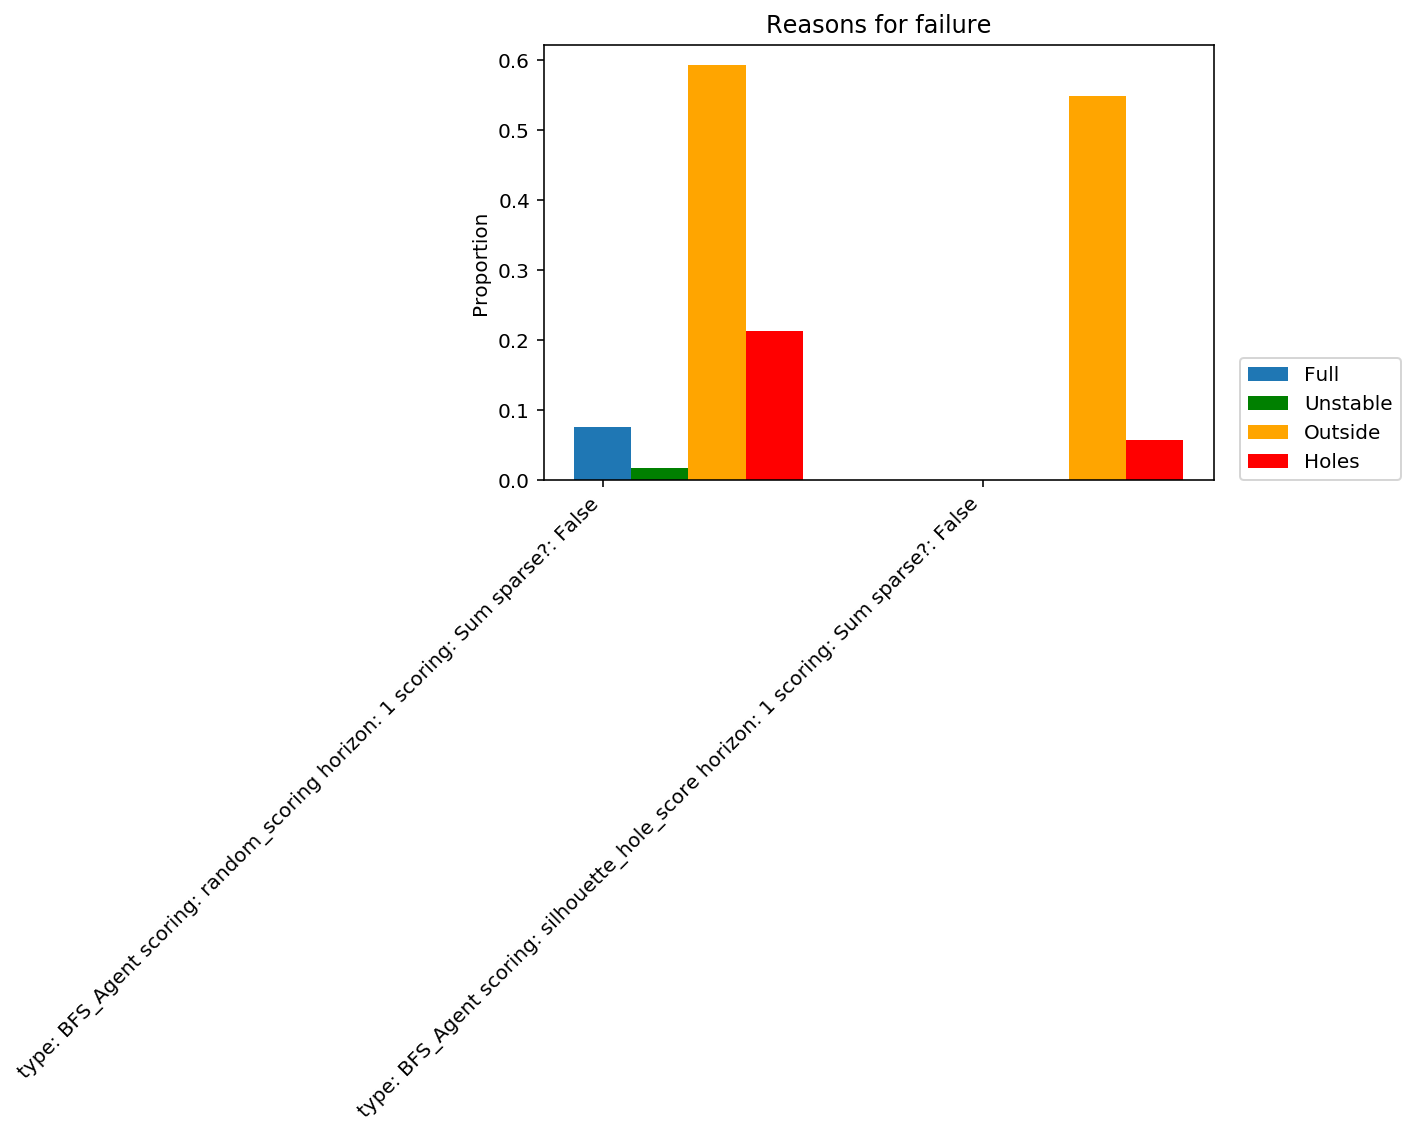

In [46]:
#📊 mean_failure_reason
#Full
scores = [mean_failure_reason(df[df['agent']==a],"Full") for a in agents]    
plt.bar(np.arange(len(scores))+0,scores,align='center',label="Full",width=0.15)
#Unstable
scores = [mean_failure_reason(df[df['agent']==a],"Unstable") for a in agents]    
plt.bar(np.arange(len(scores))+.15,scores,align='center',label="Unstable",color='green',width=0.15)
#Outside
scores = [mean_failure_reason(df[df['agent']==a],"Outside") for a in agents]    
plt.bar(np.arange(len(scores))+.3,scores,align='center',label="Outside",color='orange',width=0.15)
#Holes
scores = [mean_failure_reason(df[df['agent']==a],"Holes") for a in agents]    
plt.bar(np.arange(len(scores))+.45,scores,align='center',label="Holes",color='red',width=0.15)

plt.xticks(np.arange(len(scores)),agents,rotation=45,ha='right')
plt.ylabel("Proportion")
plt.ylim(0)
plt.title("Reasons for failure")
plt.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0)

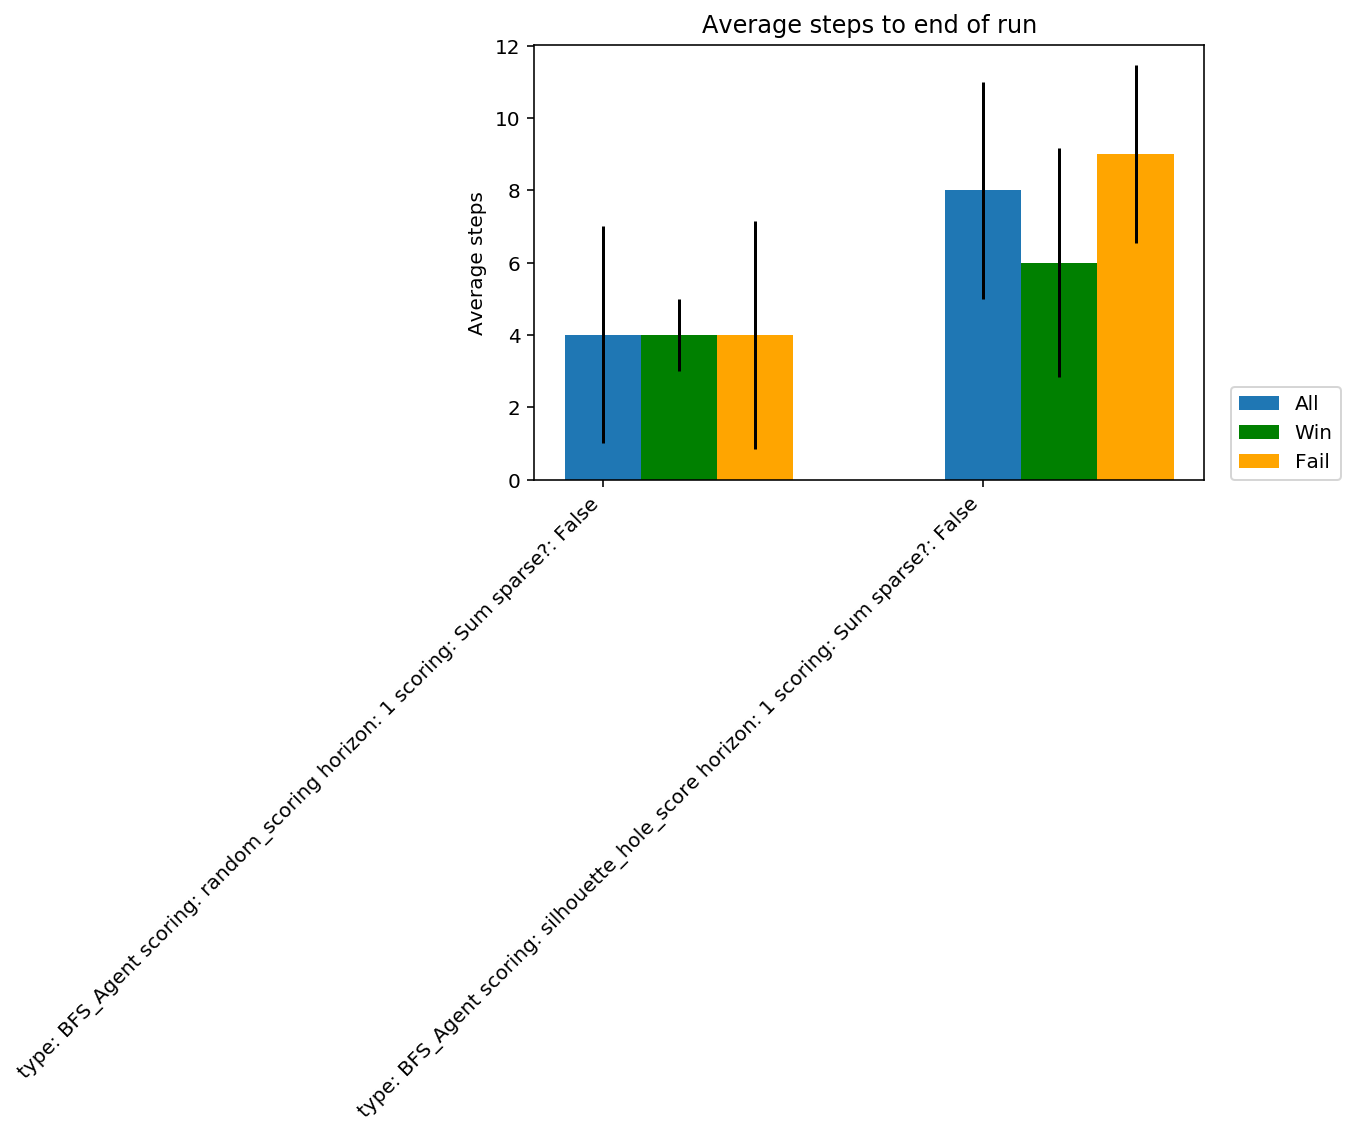

In [47]:
#📊 avg_steps_to_end
#all
results = [avg_steps_to_end(df[df['agent']==a]) for a in agents]    
scores = [score for score,std in results]
stds = [std for score,std in results]
plt.bar(np.arange(len(scores))+0,scores,align='center',yerr=stds,label="All",width=0.2)
#win
results = [avg_steps_to_end(df[(df['agent']==a) & (df['outcome'] == 'Win')]) for a in agents]    
scores = [score for score,std in results]
stds = [std for score,std in results]
plt.bar(np.arange(len(scores))+.2,scores,align='center',yerr=stds,label="Win",color='green',width=0.2)
#fail
results = [avg_steps_to_end(df[(df['agent']==a) & (df['outcome'] == 'Fail')]) for a in agents]    
scores = [score for score,std in results]
stds = [std for score,std in results]
plt.bar(np.arange(len(scores))+.4,scores,align='center',yerr=stds,label="Fail",color='orange',width=0.2)

plt.xticks(np.arange(len(scores)),agents,rotation=45,ha='right')
plt.ylabel("Average steps")
plt.ylim(0)
plt.title("Average steps to end of run")
plt.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0)

In [48]:
#📊 mean_score
scoring_function = bw.F1score
#all
results = [mean_score(df[df['agent']==a],scoring_function) for a in agents]    
scores = [score for score,std in results]
stds = [std for score,std in results]
plt.bar(np.arange(len(scores))+0,scores,align='center',yerr=stds,label="All",width=0.2)
#win
results = [mean_score(df[(df['agent']==a) & (df['outcome'] == 'Win')],scoring_function) for a in agents]    
scores = [score for score,std in results]
stds = [std for score,std in results]
plt.bar(np.arange(len(scores))+.2,scores,align='center',yerr=stds,label="Win",color='green',width=0.2)
#fail
results = [mean_score(df[(df['agent']==a) & (df['outcome'] == 'Fail')],scoring_function) for a in agents]    
scores = [score for score,std in results]
stds = [std for score,std in results]
plt.bar(np.arange(len(scores))+.4,scores,align='center',yerr=stds,label="Fail",color='orange',width=0.2)

plt.xticks(np.arange(len(scores)),agents,rotation=45,ha='right')
plt.ylabel("Mean score")
plt.ylim(0)
plt.title("Mean score: "+scoring_function.__name__)
plt.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0)

In [49]:
#📊 mean_peak_score
scoring_function = bw.F1score
#all
results = [mean_peak_score(df[df['agent']==a],scoring_function) for a in agents]    
scores = [score for score,std in results]
stds = [std for score,std in results]
plt.bar(np.arange(len(scores))+0,scores,align='center',yerr=stds,label="All",width=0.2)
#win
results = [mean_peak_score(df[(df['agent']==a) & (df['outcome'] == 'Win')],scoring_function) for a in agents]    
scores = [score for score,std in results]
stds = [std for score,std in results]
plt.bar(np.arange(len(scores))+.2,scores,align='center',yerr=stds,label="Win",color='green',width=0.2)
#fail
results = [mean_peak_score(df[(df['agent']==a) & (df['outcome'] == 'Fail')],scoring_function) for a in agents]    
scores = [score for score,std in results]
stds = [std for score,std in results]
plt.bar(np.arange(len(scores))+.4,scores,align='center',yerr=stds,label="Fail",color='orange',width=0.2)

plt.xticks(np.arange(len(scores)),agents,rotation=45,ha='right')
plt.ylabel("Mean peak score")
plt.ylim(0)
plt.title("Mean peak score: "+scoring_function.__name__)
plt.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0)

In [50]:
#📊 mean_avg_area_under_curve
scoring_function = bw.F1score
#all
results = [mean_avg_area_under_curve(df[df['agent']==a],scoring_function) for a in agents]    
scores = [score for score,std in results]
stds = [std for score,std in results]
plt.bar(np.arange(len(scores))+0,scores,align='center',yerr=stds,label="All",width=0.2)
#win
results = [mean_avg_area_under_curve(df[(df['agent']==a) & (df['outcome'] == 'Win')],scoring_function) for a in agents]    
scores = [score for score,std in results]
stds = [std for score,std in results]
plt.bar(np.arange(len(scores))+.2,scores,align='center',yerr=stds,label="Win",color='green',width=0.2)
#fail
results = [mean_avg_area_under_curve(df[(df['agent']==a) & (df['outcome'] == 'Fail')],scoring_function) for a in agents]    
scores = [score for score,std in results]
stds = [std for score,std in results]
plt.bar(np.arange(len(scores))+.4,scores,align='center',yerr=stds,label="Fail",color='orange',width=0.2)

plt.xticks(np.arange(len(scores)),agents,rotation=45,ha='right')
plt.ylabel("Mean average area under curve")
plt.ylim(0)
plt.title("Mean average area under curve per step: "+scoring_function.__name__)
plt.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0)

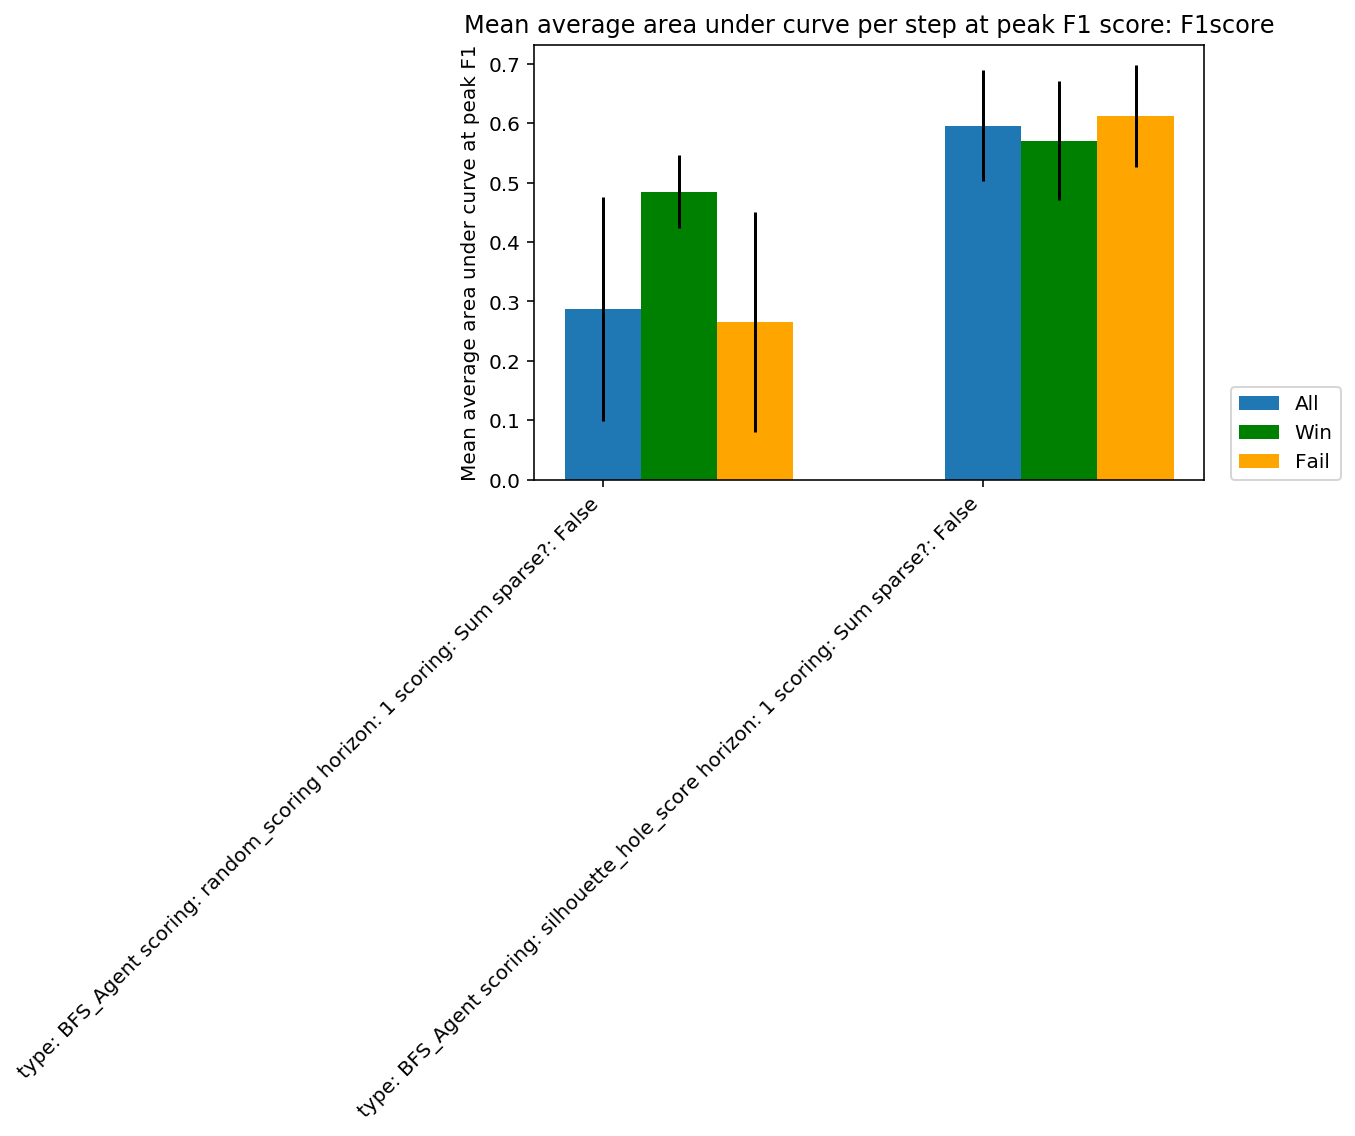

In [51]:
#📊 mean_avg_area_under_curve_to_peakF1
scoring_function = bw.F1score
#all
results = [mean_avg_area_under_curve_to_peakF1(df[df['agent']==a],scoring_function) for a in agents]    
scores = [score for score,std in results]
stds = [std for score,std in results]
plt.bar(np.arange(len(scores))+0,scores,align='center',yerr=stds,label="All",width=0.2)
#win
results = [mean_avg_area_under_curve_to_peakF1(df[(df['agent']==a) & (df['outcome'] == 'Win')],scoring_function) for a in agents]    
scores = [score for score,std in results]
stds = [std for score,std in results]
plt.bar(np.arange(len(scores))+.2,scores,align='center',yerr=stds,label="Win",color='green',width=0.2)
#fail
results = [mean_avg_area_under_curve_to_peakF1(df[(df['agent']==a) & (df['outcome'] == 'Fail')],scoring_function) for a in agents]    
scores = [score for score,std in results]
stds = [std for score,std in results]
plt.bar(np.arange(len(scores))+.4,scores,align='center',yerr=stds,label="Fail",color='orange',width=0.2)

plt.xticks(np.arange(len(scores)),agents,rotation=45,ha='right')
plt.ylabel("Mean average area under curve at peak F1")
plt.ylim(0)
plt.title("Mean average area under curve per step at peak F1 score: "+scoring_function.__name__)
plt.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0)

### Plots

In [21]:
#wins over agent
#output can be pasted into numbers with space as seperator
for agent in agents:
    wins = 0
    total = 0
    for o in df[df['agent']==agent]['outcome']:
        if o == 'Win':
            wins+=1
        total += 1
    print(wins,'/',total,str(round(100*wins/total,2))+'%',agent)

116 / 1100 10.55% type: BFS_Agent scoring: random_scoring horizon: 1 scoring: Sum sparse?: False
435 / 1100 39.55% type: BFS_Agent scoring: silhouette_hole_score horizon: 1 scoring: Sum sparse?: False


In [ ]:
#average number of steps per agent for failure and success
for agent in agents:
    win_lengths = []
    failure_lengths = []
    for i,row in df[df['agent']==agent].iterrows():
        num_steps = len(get_blockmaps(row['run'])) # get number of steps
        if row['outcome'] == 'Win':
            win_lengths.append(num_steps)
        if row['outcome'] == 'Fail':
            failure_lengths.append(num_steps)
    print(agent)
    print(len(win_lengths),"wins with avg length",sum(win_lengths)/len(win_lengths))
    print(len(failure_lengths),"wins with avg length",sum(failure_lengths)/len(failure_lengths))

In [ ]:
#failure reasons per agent
for agent in agents:
    failure_reasons = {}
    for run in df[df['agent'] == agent]['run']:
        status, reason = get_final_status(run)
        if reason in failure_reasons.keys():
            failure_reasons[reason] += 1
        else:
            failure_reasons[reason] = 1
    print(agent,'\n',failure_reasons)

In [ ]:
#plot F1 over time for agent
for agent in agents:
    plt.clf() #clear the plot
    for run in df[df['agent']==agent]['run']:
        plt.plot(run['F1 score'].to_list(),linewidth=0.3)
    plt.title(agent)
    plt.xlim([0,20])
    plt.ylim([0,1])
    plt.show()

In [ ]:
#plot blocksize over time for agent
for agent in agents:
    plt.clf() #clear the plot
    for run in df[df['agent']==agent]['run']:
        blocks_obj = run[run.notnull()['chosen action']]['chosen action'].to_list()
        size = [float(a)*float(b) for a,b in [b[0][0][1:-1].split('x') for b in blocks_obj]]
        plt.plot(size,linewidth=0.3)
    plt.title(agent)
    plt.show()

In [ ]:
#plot avg blocksize over time for agent
for agent in agents:
    plt.clf() #clear the plot
    for run in df[df['agent']==agent]['run']:
        blocks_obj = run[run.notnull()['chosen action']]['chosen action'].to_list()
        size = [float(a)*float(b) for a,b in [b[0][0][1:-1].split('x') for b in blocks_obj]]
        plt.plot(size,linewidth=0.3)
    plt.title("Average blocksize for "+agent)
    plt.show()

## Per world
Makes more sense to selectively run worlds in the section further below.

In [37]:
worlds = df['world'].unique()

### Bar graphs

Text(0.5, 1.0, 'Perfect reconstruction')

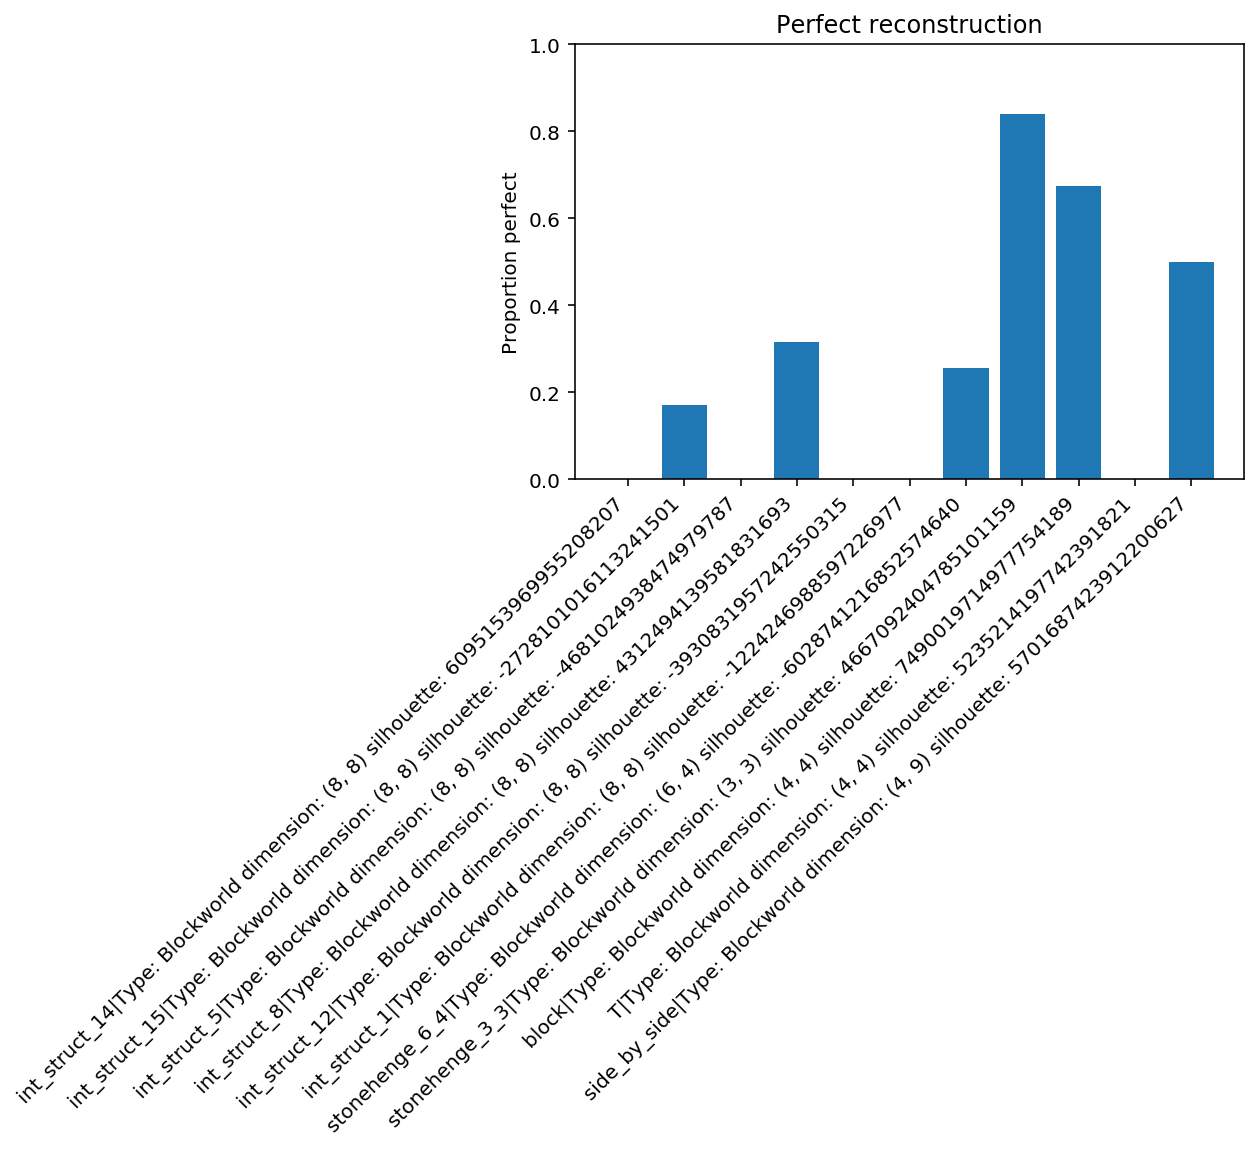

In [52]:
#📊 mean_win
scores = [mean_win(df[df['world']==w]) for w in worlds]    
plt.bar(np.arange(len(scores)),scores,align='center')
plt.xticks(np.arange(len(scores)),worlds,rotation=45,ha='right')
plt.ylim(0,1)
plt.ylabel("Proportion perfect")
plt.title("Perfect reconstruction")
# plt.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0)

In [53]:
#📊 mean_failure_reason
#Full
scores = [mean_failure_reason(df[df['world']==w],"Full") for w in worlds]    
plt.bar(np.arange(len(scores))+0,scores,align='center',label="Full",width=0.15)
#Unstable
scores = [mean_failure_reason(df[df['world']==w],"Unstable") for w in worlds]    
plt.bar(np.arange(len(scores))+.15,scores,align='center',label="Unstable",color='green',width=0.15)
#Outside
scores = [mean_failure_reason(df[df['world']==w],"Outside") for w in worlds]    
plt.bar(np.arange(len(scores))+.3,scores,align='center',label="Outside",color='orange',width=0.15)
#Holes
scores = [mean_failure_reason(df[df['world']==w],"Holes") for w in worlds]    
plt.bar(np.arange(len(scores))+.45,scores,align='center',label="Holes",color='red',width=0.15)

plt.xticks(np.arange(len(scores)),worlds,rotation=45,ha='right')
plt.ylabel("Proportion")
plt.ylim(0)
plt.title("Reasons for failure")
plt.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0)

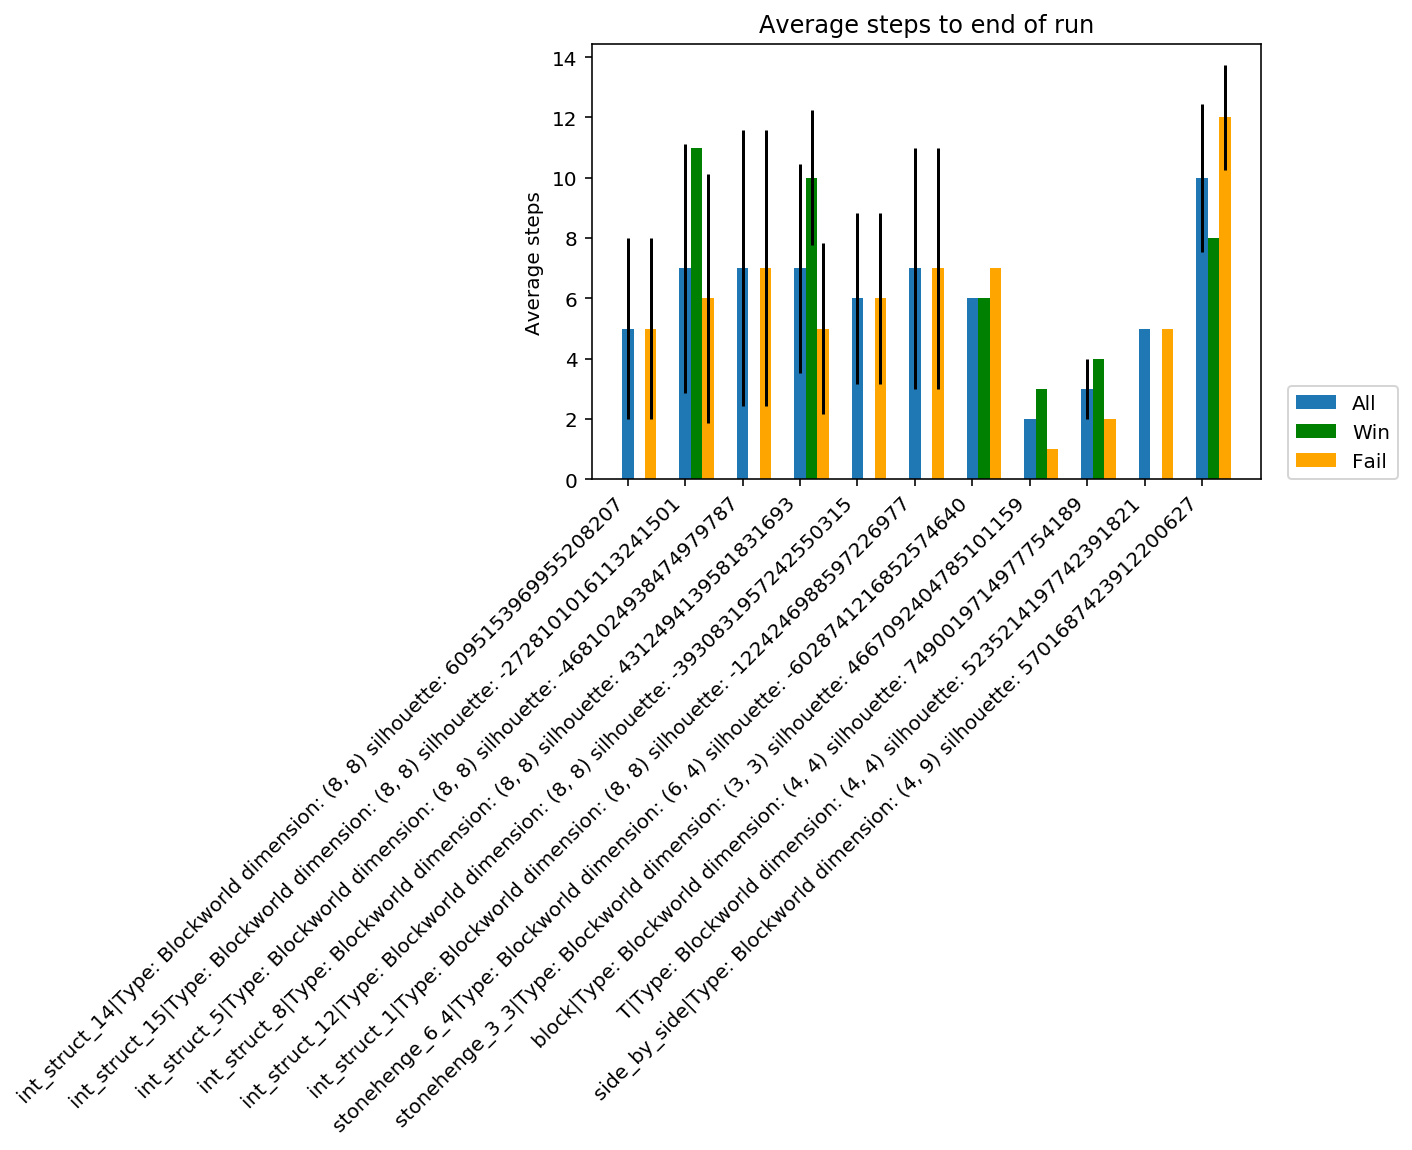

In [54]:
#📊 avg_steps_to_end
#all
results = [avg_steps_to_end(df[df['world']==w]) for w in worlds]    
scores = [score for score,std in results]
stds = [std for score,std in results]
plt.bar(np.arange(len(scores))+0,scores,align='center',yerr=stds,label="All",width=0.2)
#win
results = [avg_steps_to_end(df[(df['world']==w) & (df['outcome'] == 'Win')]) for w in worlds]    
scores = [score for score,std in results]
stds = [std for score,std in results]
plt.bar(np.arange(len(scores))+.2,scores,align='center',yerr=stds,label="Win",color='green',width=0.2)
#fail
results = [avg_steps_to_end(df[(df['world']==w) & (df['outcome'] == 'Fail')]) for w in worlds]    
scores = [score for score,std in results]
stds = [std for score,std in results]
plt.bar(np.arange(len(scores))+.4,scores,align='center',yerr=stds,label="Fail",color='orange',width=0.2)

plt.xticks(np.arange(len(scores)),worlds,rotation=45,ha='right')
plt.ylabel("Average steps")
plt.ylim(0)
plt.title("Average steps to end of run")
plt.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0)

In [55]:
#📊 mean_score
scoring_function = bw.F1score
#all
results = [mean_score(df[df['world']==w],scoring_function) for w in worlds]    
scores = [score for score,std in results]
stds = [std for score,std in results]
plt.bar(np.arange(len(scores))+0,scores,align='center',yerr=stds,label="All",width=0.2)
#win
results = [mean_score(df[(df['world']==w) & (df['outcome'] == 'Win')],scoring_function) for w in worlds]    
scores = [score for score,std in results]
stds = [std for score,std in results]
plt.bar(np.arange(len(scores))+.2,scores,align='center',yerr=stds,label="Win",color='green',width=0.2)
#fail
results = [mean_score(df[(df['world']==w) & (df['outcome'] == 'Fail')],scoring_function) for w in worlds]    
scores = [score for score,std in results]
stds = [std for score,std in results]
plt.bar(np.arange(len(scores))+.4,scores,align='center',yerr=stds,label="Fail",color='orange',width=0.2)

plt.xticks(np.arange(len(scores)),worlds,rotation=45,ha='right')
plt.ylabel("Mean score")
plt.ylim(0)
plt.title("Mean score: "+scoring_function.__name__)
plt.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0)

In [56]:
#📊 mean_peak_score
scoring_function = bw.F1score
#all
results = [mean_peak_score(df[df['world']==w],scoring_function) for w in worlds]    
scores = [score for score,std in results]
stds = [std for score,std in results]
plt.bar(np.arange(len(scores))+0,scores,align='center',yerr=stds,label="All",width=0.2)
#win
results = [mean_peak_score(df[(df['world']==w) & (df['outcome'] == 'Win')],scoring_function) for w in worlds]    
scores = [score for score,std in results]
stds = [std for score,std in results]
plt.bar(np.arange(len(scores))+.2,scores,align='center',yerr=stds,label="Win",color='green',width=0.2)
#fail
results = [mean_peak_score(df[(df['world']==w) & (df['outcome'] == 'Fail')],scoring_function) for w in worlds]    
scores = [score for score,std in results]
stds = [std for score,std in results]
plt.bar(np.arange(len(scores))+.4,scores,align='center',yerr=stds,label="Fail",color='orange',width=0.2)

plt.xticks(np.arange(len(scores)),worlds,rotation=45,ha='right')
plt.ylabel("Mean peak score")
plt.ylim(0)
plt.title("Mean peak score: "+scoring_function.__name__)
plt.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0)

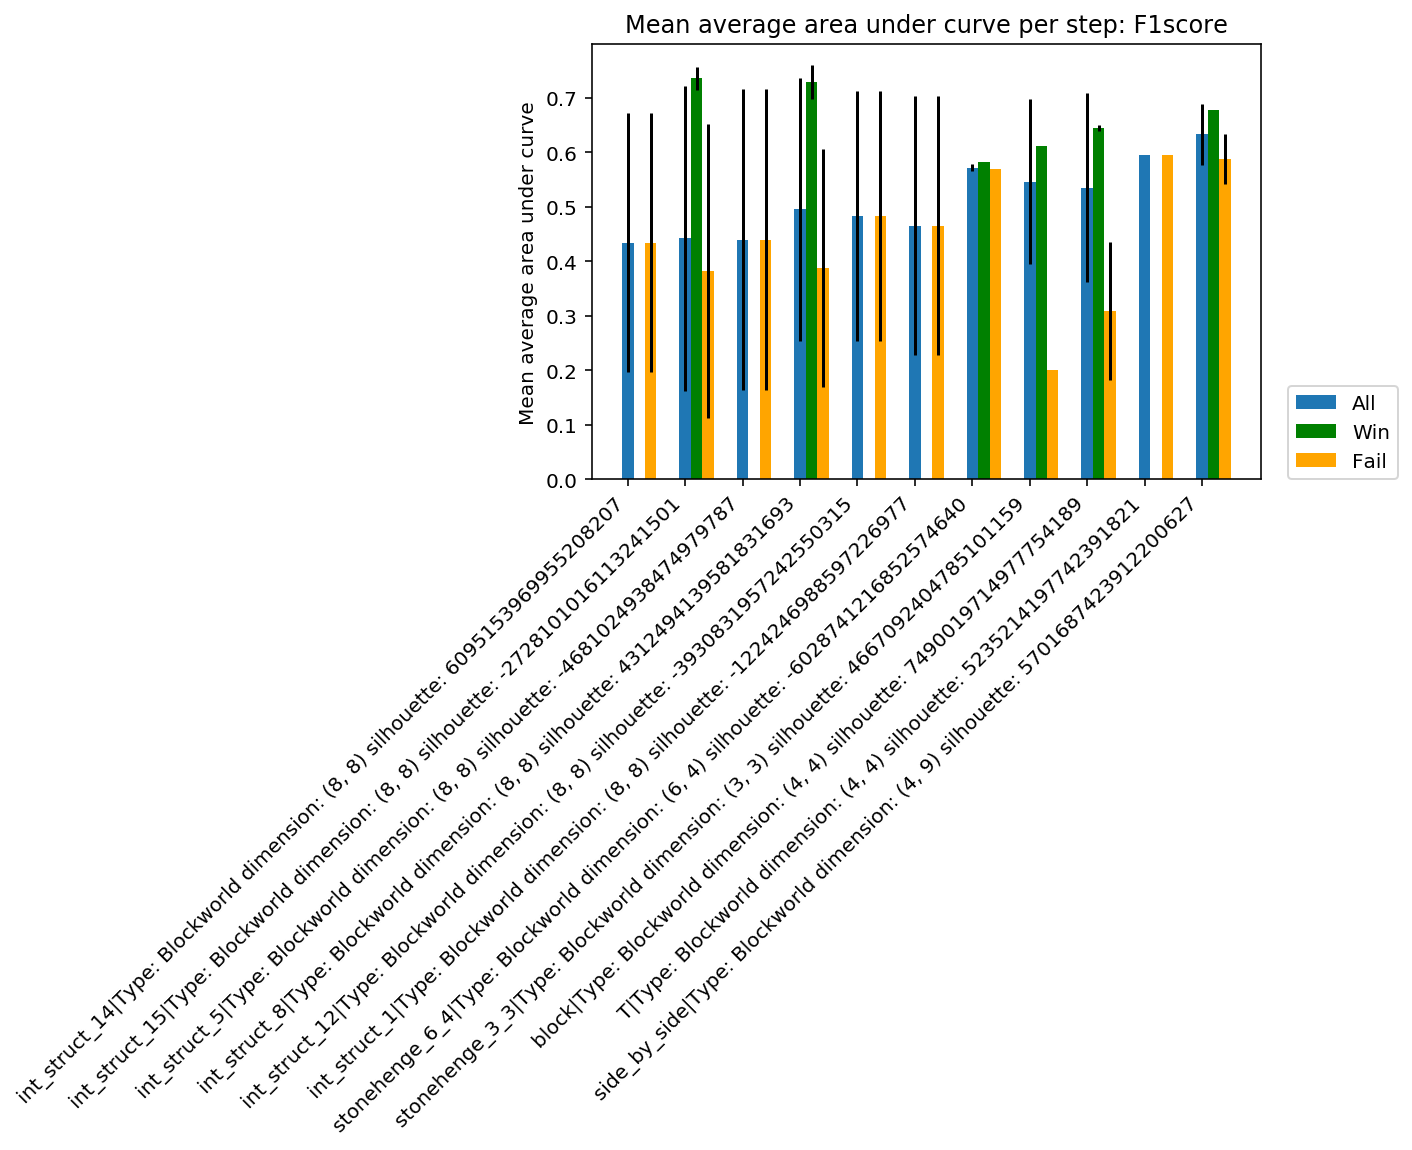

In [58]:
#📊 mean_avg_area_under_curve
scoring_function = bw.F1score
#all
results = [mean_avg_area_under_curve(df[df['world']==w],scoring_function) for w in worlds]    
scores = [score for score,std in results]
stds = [std for score,std in results]
plt.bar(np.arange(len(scores))+0,scores,align='center',yerr=stds,label="All",width=0.2)
#win
results = [mean_avg_area_under_curve(df[(df['world']==w) & (df['outcome'] == 'Win')],scoring_function) for w in worlds]    
scores = [score for score,std in results]
stds = [std for score,std in results]
plt.bar(np.arange(len(scores))+.2,scores,align='center',yerr=stds,label="Win",color='green',width=0.2)
#fail
results = [mean_avg_area_under_curve(df[(df['world']==w) & (df['outcome'] == 'Fail')],scoring_function) for w in worlds]    
scores = [score for score,std in results]
stds = [std for score,std in results]
plt.bar(np.arange(len(scores))+.4,scores,align='center',yerr=stds,label="Fail",color='orange',width=0.2)

plt.xticks(np.arange(len(scores)),worlds,rotation=45,ha='right')
plt.ylabel("Mean average area under curve")
plt.ylim(0)
plt.title("Mean average area under curve per step: "+scoring_function.__name__)
plt.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0)

In [59]:
#📊 mean_avg_area_under_curve_to_peakF1
scoring_function = bw.F1score
#all
results = [mean_avg_area_under_curve_to_peakF1(df[df['world']==w],scoring_function) for w in worlds]    
scores = [score for score,std in results]
stds = [std for score,std in results]
plt.bar(np.arange(len(scores))+0,scores,align='center',yerr=stds,label="All",width=0.2)
#win
results = [mean_avg_area_under_curve_to_peakF1(df[(df['world']==w) & (df['outcome'] == 'Win')],scoring_function) for w in worlds]    
scores = [score for score,std in results]
stds = [std for score,std in results]
plt.bar(np.arange(len(scores))+.2,scores,align='center',yerr=stds,label="Win",color='green',width=0.2)
#fail
results = [mean_avg_area_under_curve_to_peakF1(df[(df['world']==w) & (df['outcome'] == 'Fail')],scoring_function) for w in worlds]    
scores = [score for score,std in results]
stds = [std for score,std in results]
plt.bar(np.arange(len(scores))+.4,scores,align='center',yerr=stds,label="Fail",color='orange',width=0.2)

plt.xticks(np.arange(len(scores)),worlds,rotation=45,ha='right')
plt.ylabel("Mean average area under curve at peak F1")
plt.ylim(0)
plt.title("Mean average area under curve per step at peak F1 score: "+scoring_function.__name__)
plt.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0)

In [ ]:
#wins over world
for world in worlds_index:
    wins = 0
    total = 0
    for o in df[df['world'].str.contains(world)]['outcome']:
        if o == 'Win':
            wins+=1
        total += 1
    print(wins,'/',total,str(round(100*wins/total,2))+'%',world)

### Plots & Visualizations

In [ ]:
#images of worlds
for i,world in enumerate(bw_worlds.values()):
    plt.figure(figsize=(20,20))
    plt.subplot(3,4,i+1)
    plt.imshow(world.silhouette)
    plt.xticks([])
    plt.yticks([])
plt.show()

In [ ]:
#CAUTION, lots of data
#plot all blockmaps
for agent in agents:
    plt.clf() #clear the plot
    for run in df[df['agent']==agent]['run']:
        bm_obj = run[run.notnull()['blockmap']]['blockmap'].tail(1)
        blockmap = np.array(bm_obj.to_list())[0,0,::] #convert object back to np and take the wrappers off
        plt.pcolormesh(blockmap[::-1], cmap='hot_r',vmin=0)
        plt.title(agent)
        plt.show()

In [ ]:
#win ratio for world
for world in worlds_index:
    won = 0
    total = 0
    for index,outcome in df[(df['world'].str.contains(world))][['outcome']].iterrows():
        if outcome[0] == 'Win': won += 1
        total += 1
    plt.figure(figsize=(1,1))
    plt.imshow(bw_worlds[world.split('|')[0]].silhouette)
    plt.show()
    print(won,'/',total,'->',(won/total)*100,'%')


## Per world & agent
Creates **a lot** of bars, better to use chosen world section.

More plots in chosen world section

In [60]:
agents_worlds = [(a,w) for a in agents for w in worlds]

### Bar graphs

In [61]:
#📊 mean_win
scores = [mean_win(df[(df['world']==w) & (df['agent']==a)]) for a,w in agents_worlds]    
plt.bar(np.arange(len(scores)),scores,align='center')
plt.xticks(np.arange(len(scores)),agents_worlds,rotation=45,ha='right')
plt.ylim(0,1)
plt.ylabel("Proportion perfect")
plt.title("Perfect reconstruction")
# plt.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0)

Text(0.5, 1.0, 'Perfect reconstruction')

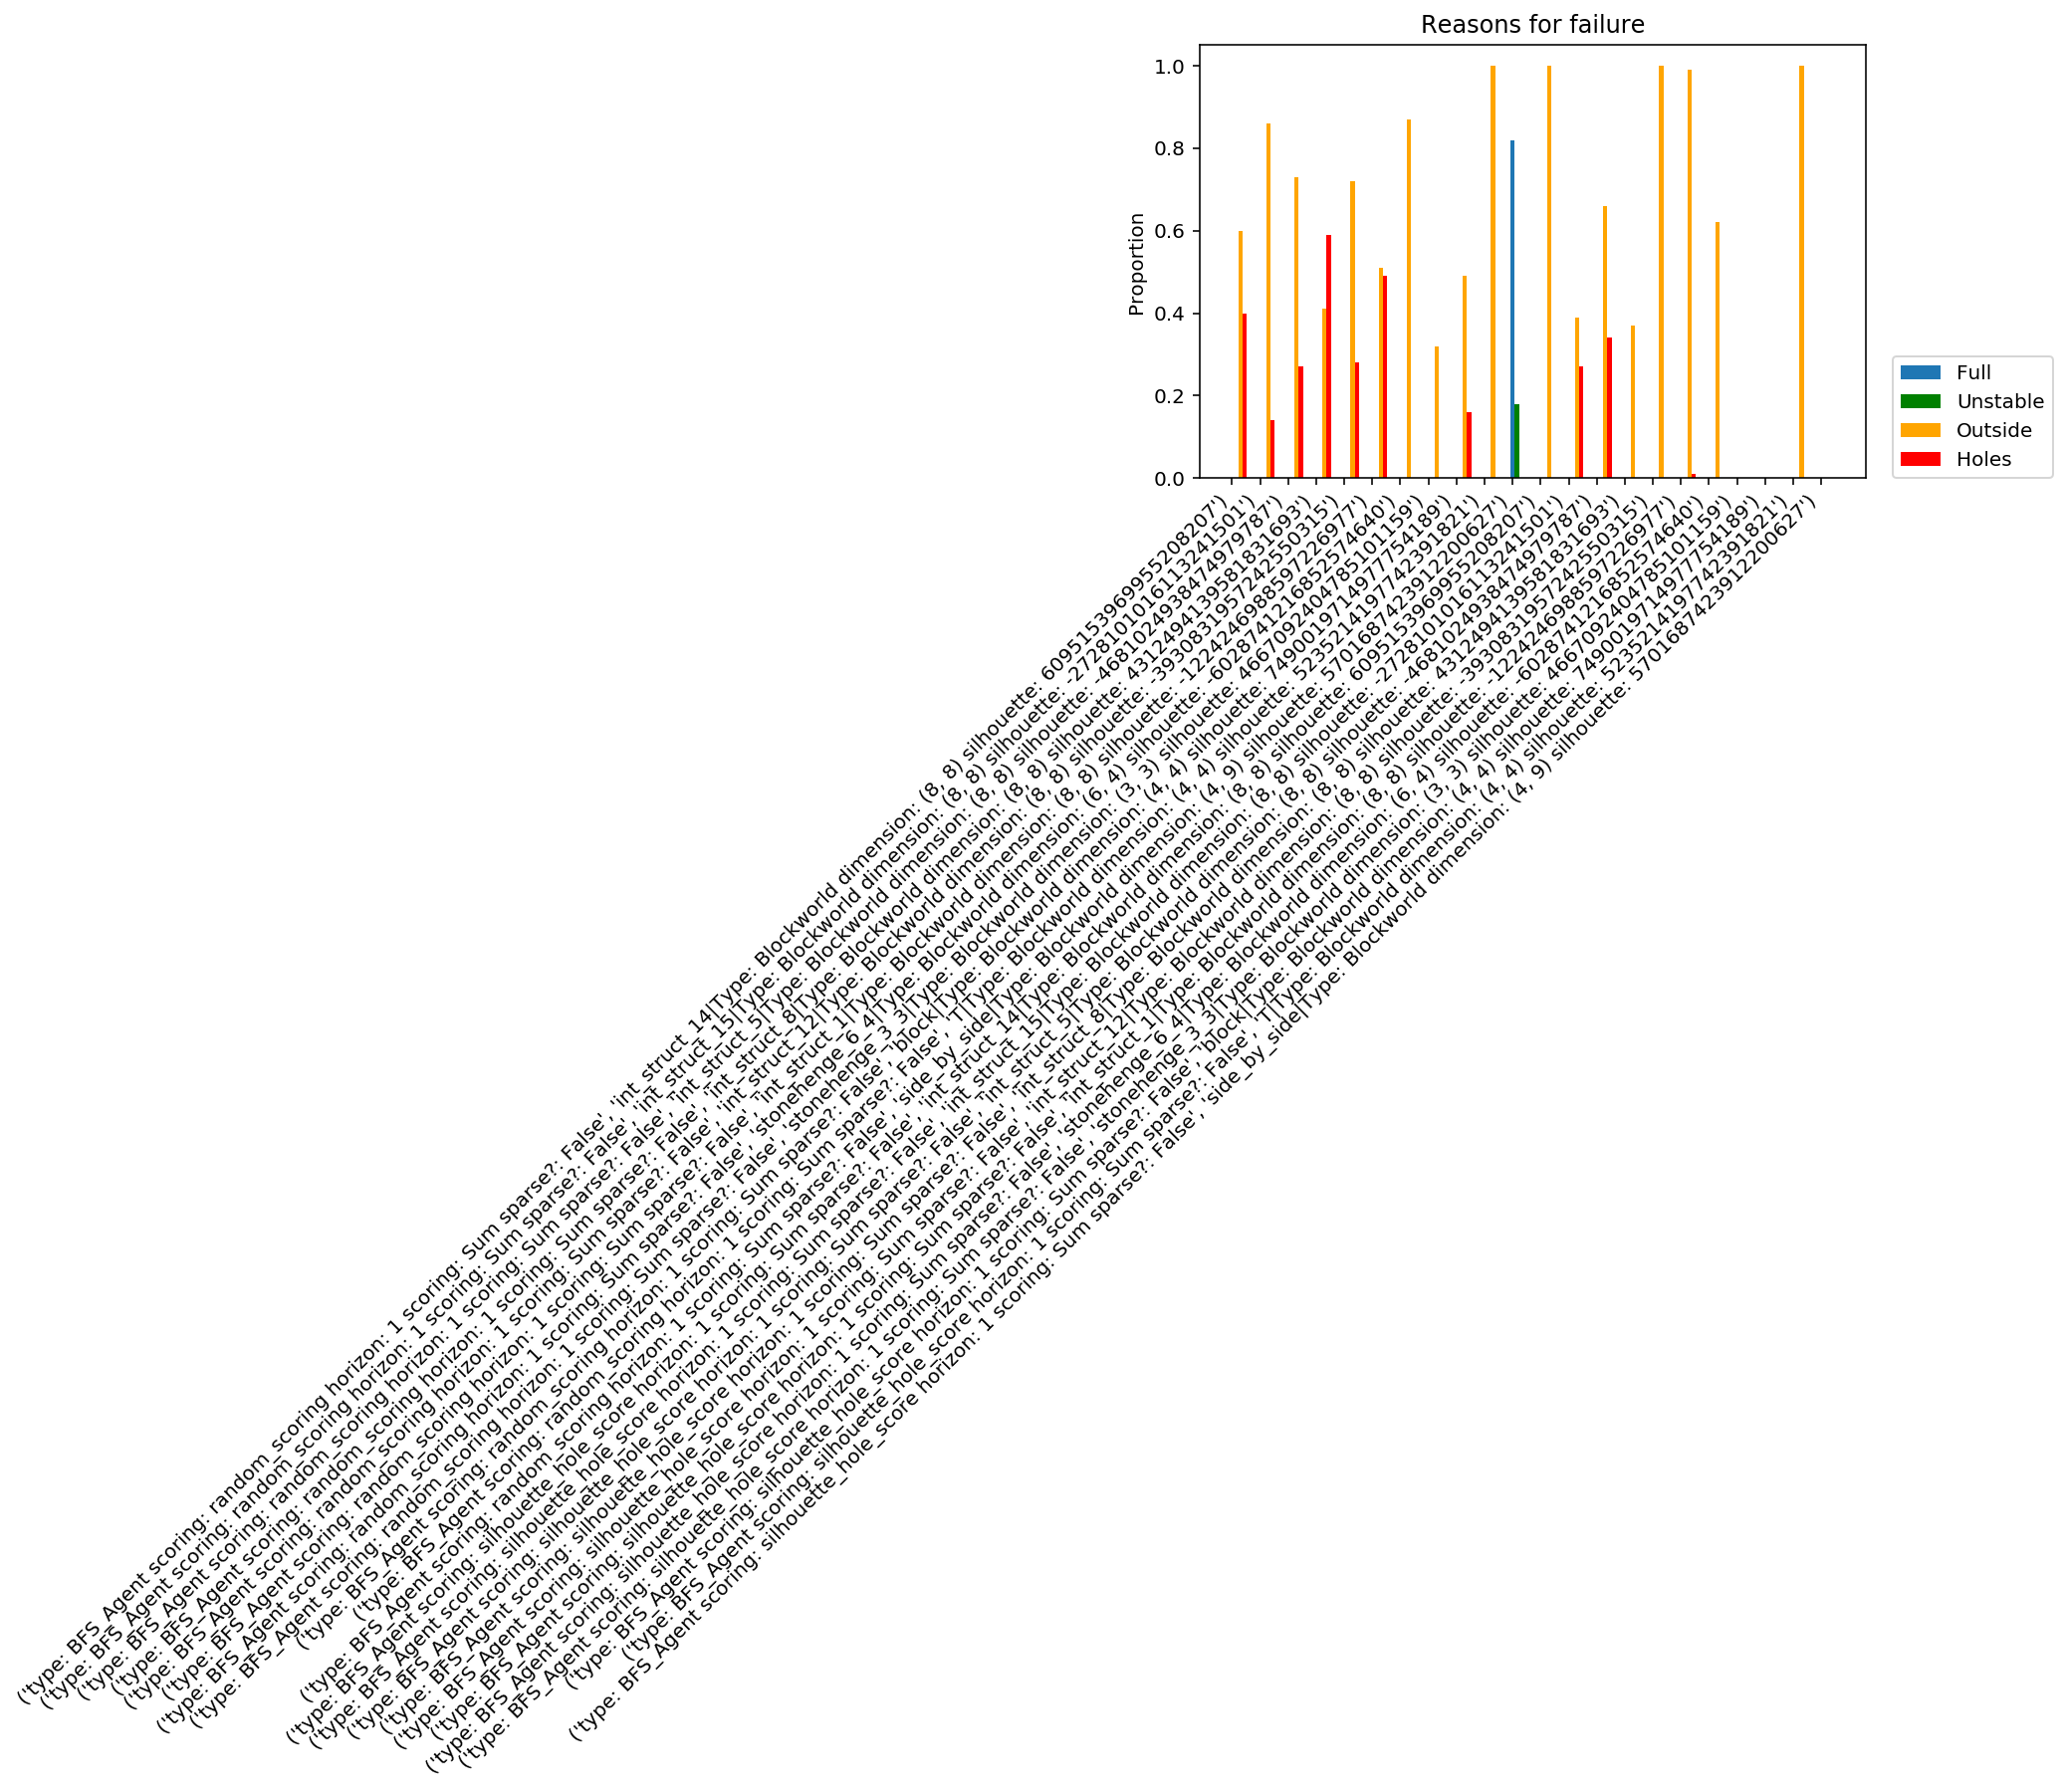

In [62]:
#📊 mean_failure_reason
#Full
scores = [mean_failure_reason(df[(df['world']==w) & (df['agent']==a)],"Full") for a,w in agents_worlds]
plt.bar(np.arange(len(scores))+0,scores,align='center',label="Full",width=0.15)
#Unstable
scores = [mean_failure_reason(df[(df['world']==w) & (df['agent']==a)],"Unstable") for a,w in agents_worlds]
plt.bar(np.arange(len(scores))+.15,scores,align='center',label="Unstable",color='green',width=0.15)
#Outside
scores = [mean_failure_reason(df[(df['world']==w) & (df['agent']==a)],"Outside") for a,w in agents_worlds]
plt.bar(np.arange(len(scores))+.3,scores,align='center',label="Outside",color='orange',width=0.15)
#Holes
scores = [mean_failure_reason(df[(df['world']==w) & (df['agent']==a)],"Holes") for a,w in agents_worlds]
plt.bar(np.arange(len(scores))+.45,scores,align='center',label="Holes",color='red',width=0.15)

plt.xticks(np.arange(len(scores)),agents_worlds,rotation=45,ha='right')
plt.ylabel("Proportion")
plt.ylim(0)
plt.title("Reasons for failure")
plt.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0)

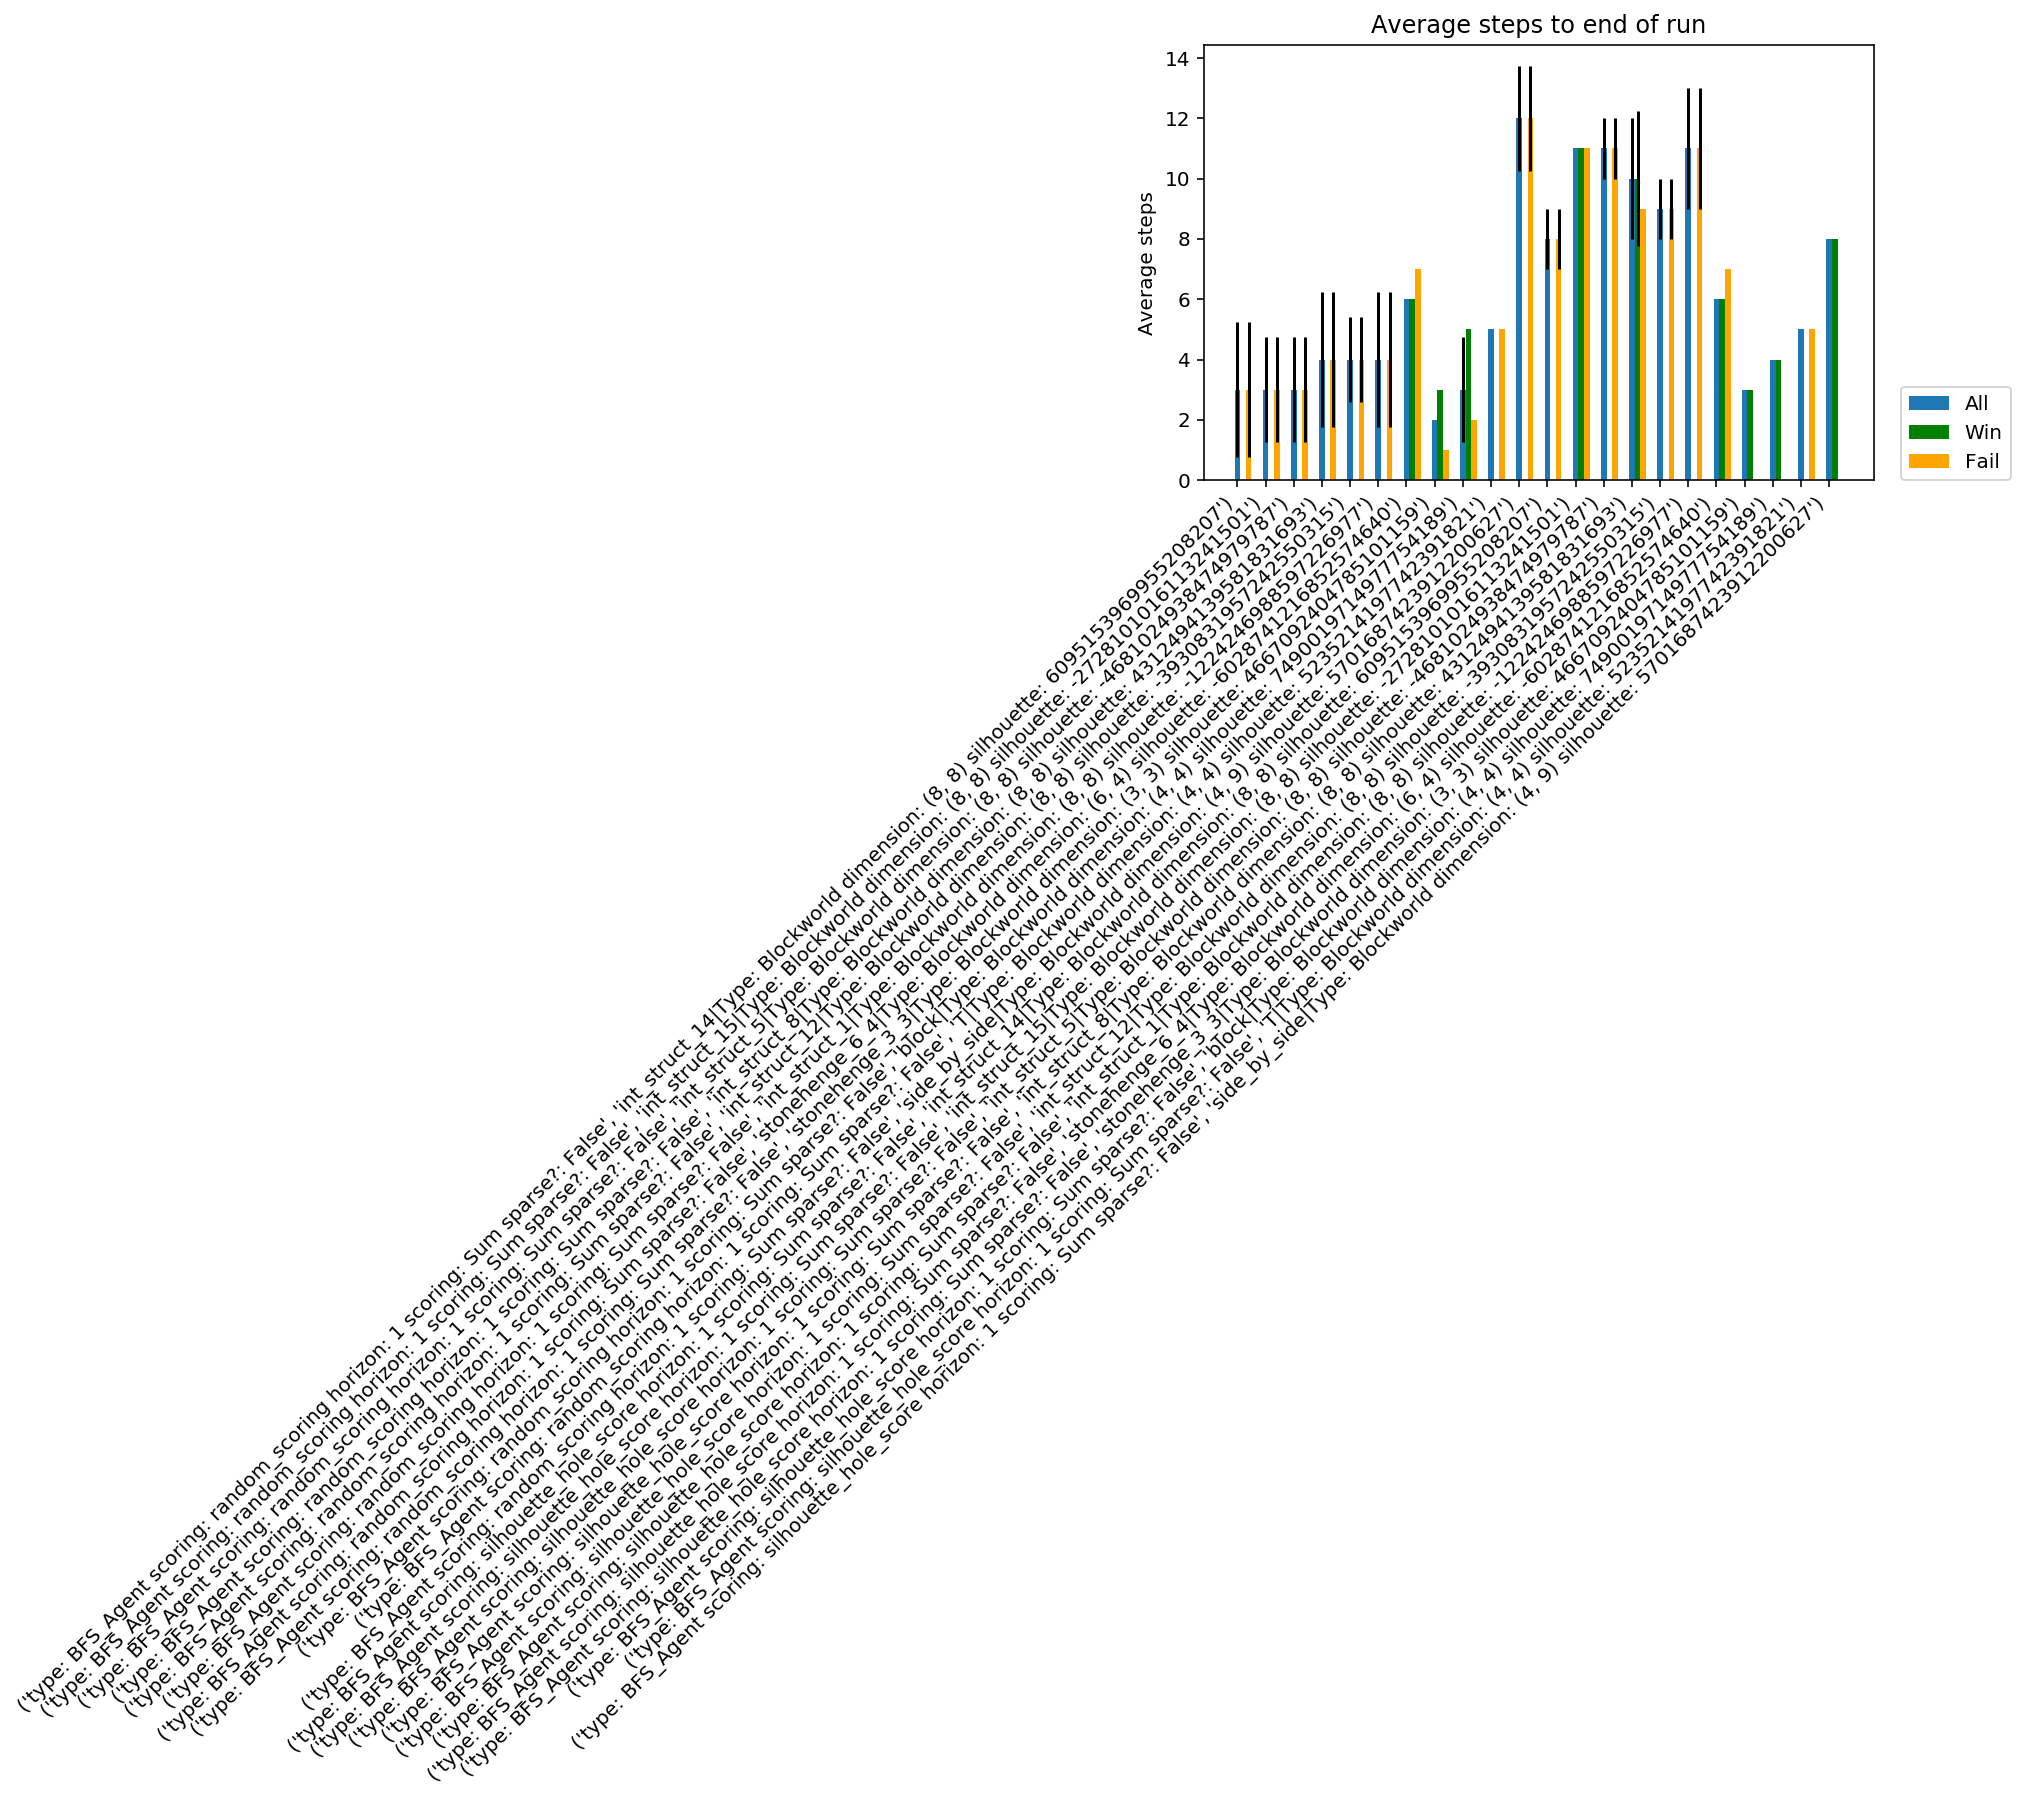

In [63]:
#📊 avg_steps_to_end
#all
results = [avg_steps_to_end(df[(df['world']==w) & (df['agent']==a)]) for a,w in agents_worlds]    
scores = [score for score,std in results]
stds = [std for score,std in results]
plt.bar(np.arange(len(scores))+0,scores,align='center',yerr=stds,label="All",width=0.2)
#win
results = [avg_steps_to_end(df[(df['world']==w) & (df['agent']==a)  & (df['outcome'] == 'Win')]) for a,w in agents_worlds]    
scores = [score for score,std in results]
stds = [std for score,std in results]
plt.bar(np.arange(len(scores))+.2,scores,align='center',yerr=stds,label="Win",color='green',width=0.2)
#fail
results = [avg_steps_to_end(df[(df['world']==w) & (df['agent']==a)  & (df['outcome'] == 'Fail')]) for a,w in agents_worlds]    
scores = [score for score,std in results]
stds = [std for score,std in results]
plt.bar(np.arange(len(scores))+.4,scores,align='center',yerr=stds,label="Fail",color='orange',width=0.2)

plt.xticks(np.arange(len(scores)),agents_worlds,rotation=45,ha='right')
plt.ylabel("Average steps")
plt.ylim(0)
plt.title("Average steps to end of run")
plt.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0)

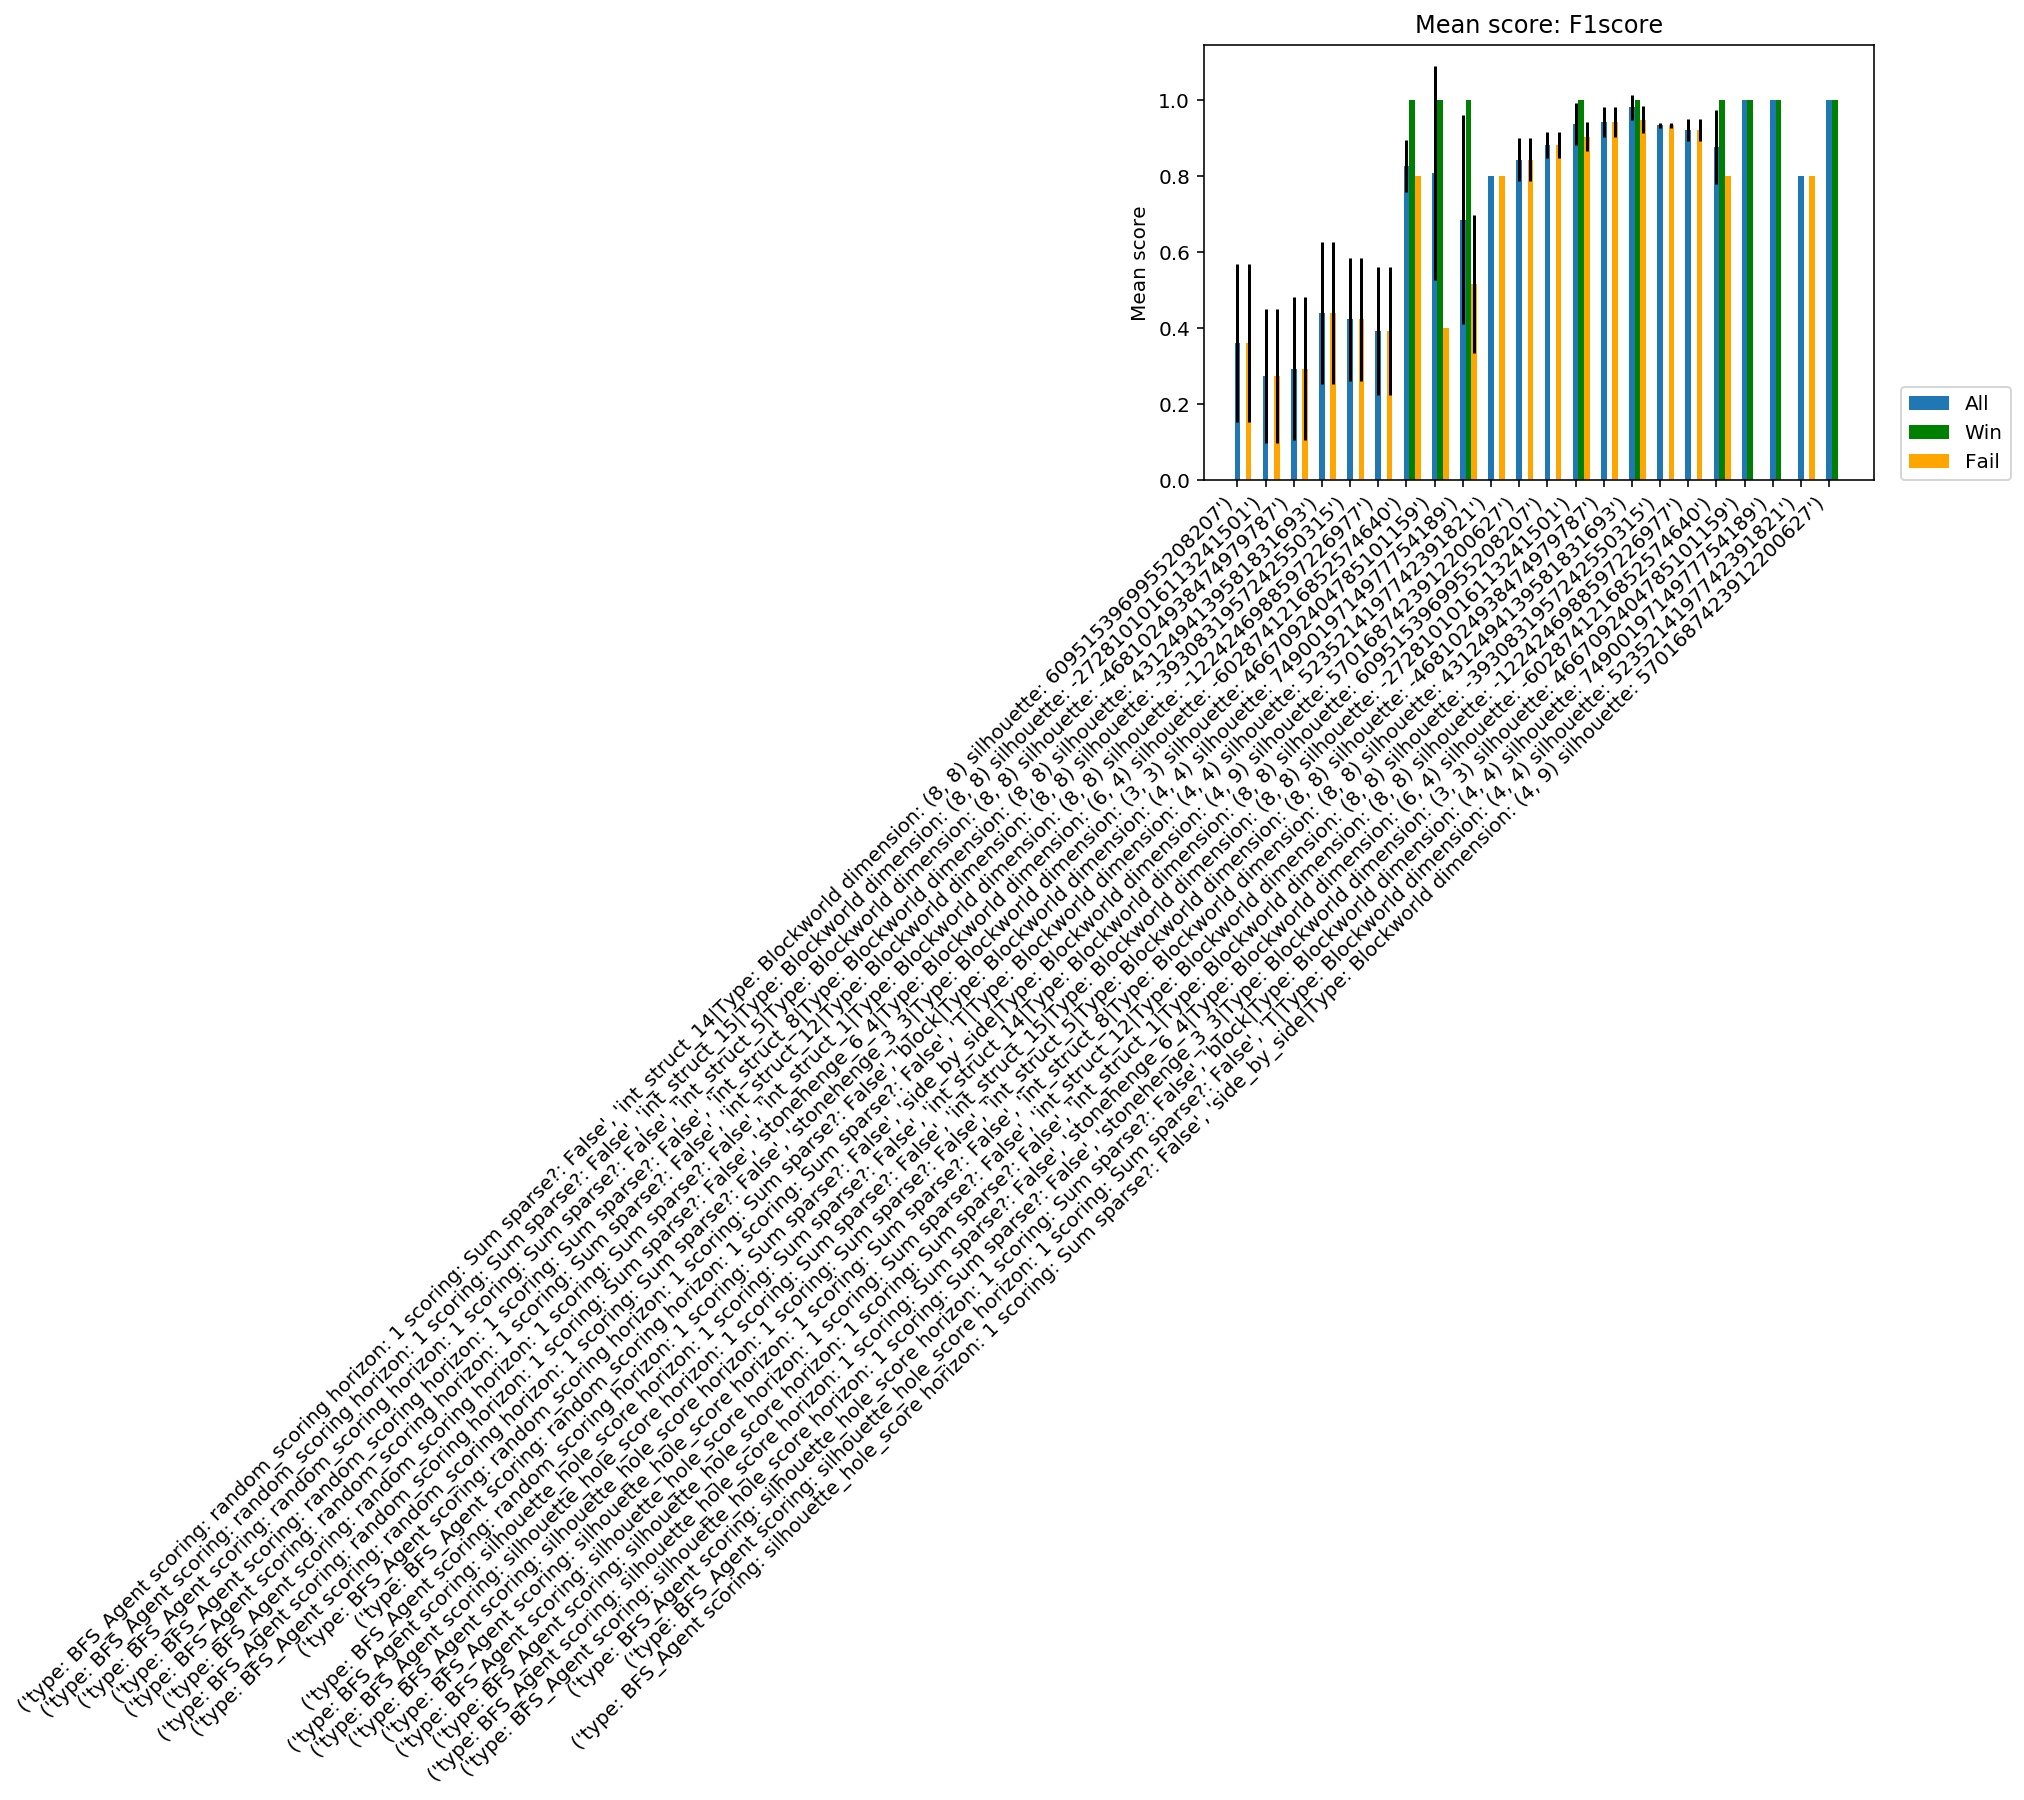

In [64]:
#📊 mean_score
scoring_function = bw.F1score
#all
results = [mean_score(df[(df['world']==w) & (df['agent']==a)],scoring_function) for a,w in agents_worlds]    
scores = [score for score,std in results]
stds = [std for score,std in results]
plt.bar(np.arange(len(scores))+0,scores,align='center',yerr=stds,label="All",width=0.2)
#win
results = [mean_score(df[(df['world']==w) & (df['agent']==a)  & (df['outcome'] == 'Win')],scoring_function) for a,w in agents_worlds]    
scores = [score for score,std in results]
stds = [std for score,std in results]
plt.bar(np.arange(len(scores))+.2,scores,align='center',yerr=stds,label="Win",color='green',width=0.2)
#fail
results = [mean_score(df[(df['world']==w) & (df['agent']==a)  & (df['outcome'] == 'Fail')],scoring_function) for a,w in agents_worlds]    
scores = [score for score,std in results]
stds = [std for score,std in results]
plt.bar(np.arange(len(scores))+.4,scores,align='center',yerr=stds,label="Fail",color='orange',width=0.2)

plt.xticks(np.arange(len(scores)),agents_worlds,rotation=45,ha='right')
plt.ylabel("Mean score")
plt.ylim(0)
plt.title("Mean score: "+scoring_function.__name__)
plt.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0)

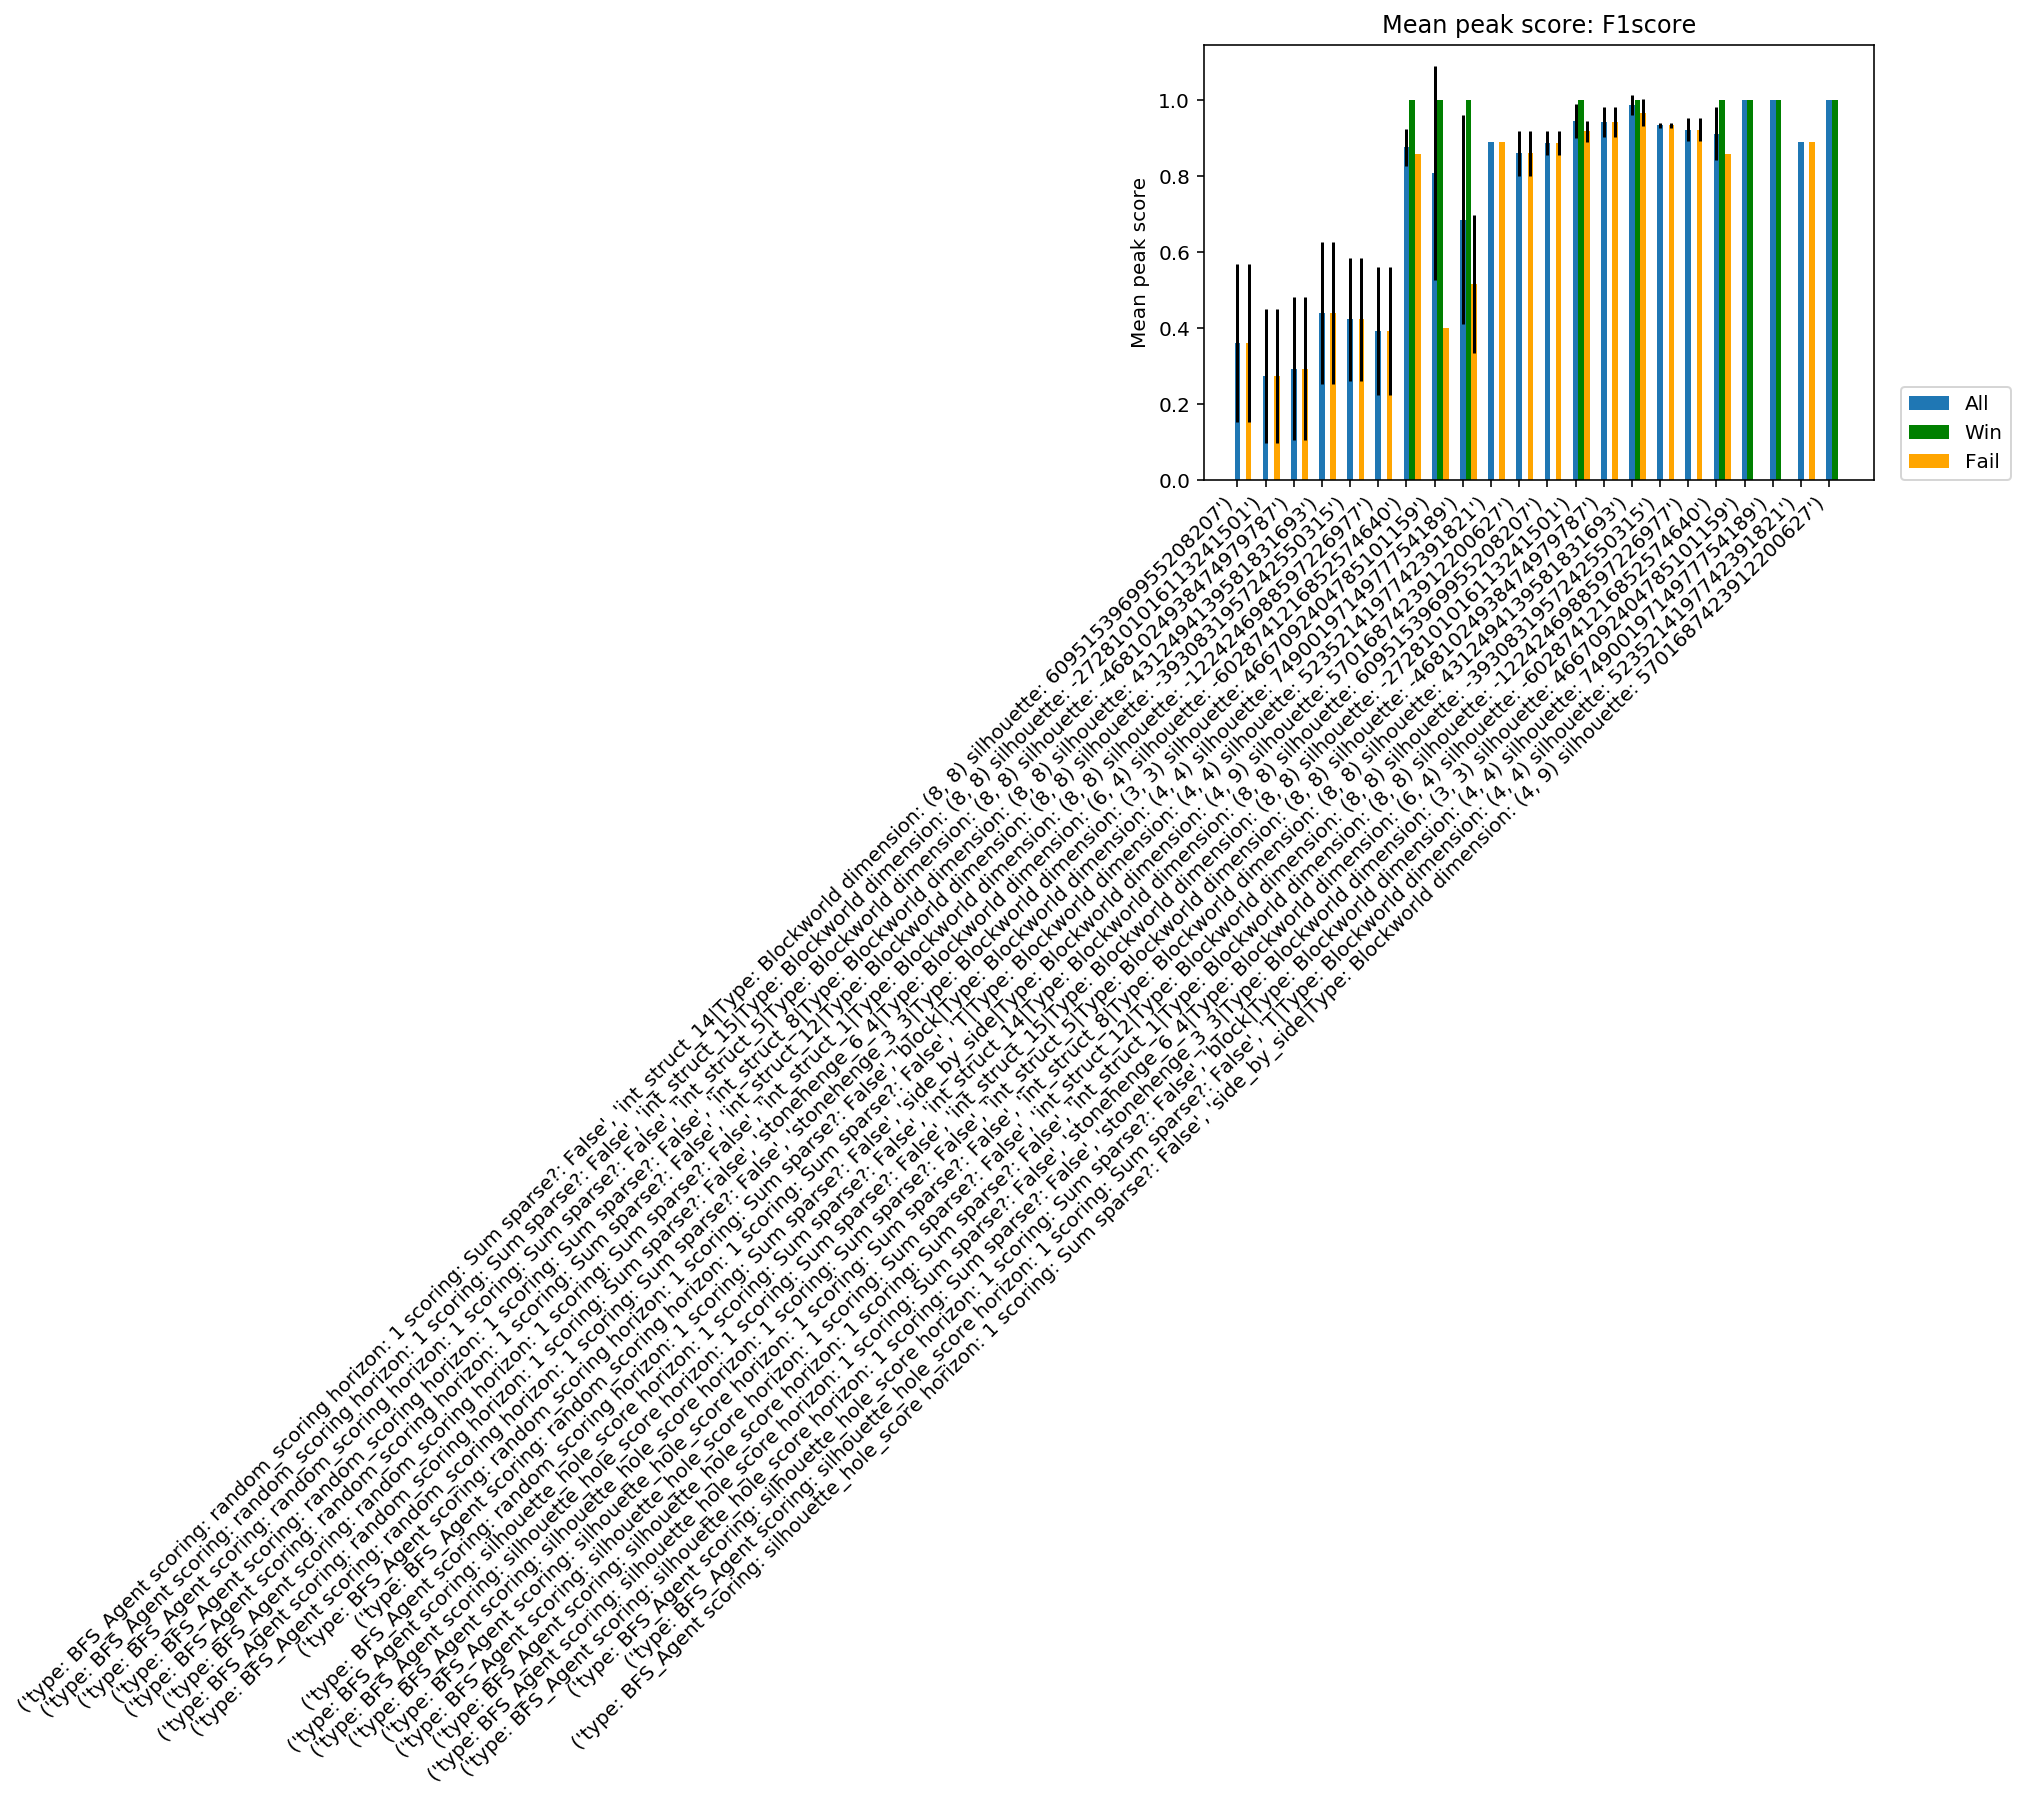

In [65]:
#📊 mean_peak_score
scoring_function = bw.F1score
#all
results = [mean_peak_score(df[(df['world']==w) & (df['agent']==a)],scoring_function) for a,w in agents_worlds]    
scores = [score for score,std in results]
stds = [std for score,std in results]
plt.bar(np.arange(len(scores))+0,scores,align='center',yerr=stds,label="All",width=0.2)
#win
results = [mean_peak_score(df[(df['world']==w) & (df['agent']==a)  & (df['outcome'] == 'Win')],scoring_function) for a,w in agents_worlds]    
scores = [score for score,std in results]
stds = [std for score,std in results]
plt.bar(np.arange(len(scores))+.2,scores,align='center',yerr=stds,label="Win",color='green',width=0.2)
#fail
results = [mean_peak_score(df[(df['world']==w) & (df['agent']==a)  & (df['outcome'] == 'Fail')],scoring_function) for a,w in agents_worlds]    
scores = [score for score,std in results]
stds = [std for score,std in results]
plt.bar(np.arange(len(scores))+.4,scores,align='center',yerr=stds,label="Fail",color='orange',width=0.2)

plt.xticks(np.arange(len(scores)),agents_worlds,rotation=45,ha='right')
plt.ylabel("Mean peak score")
plt.ylim(0)
plt.title("Mean peak score: "+scoring_function.__name__)
plt.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0)

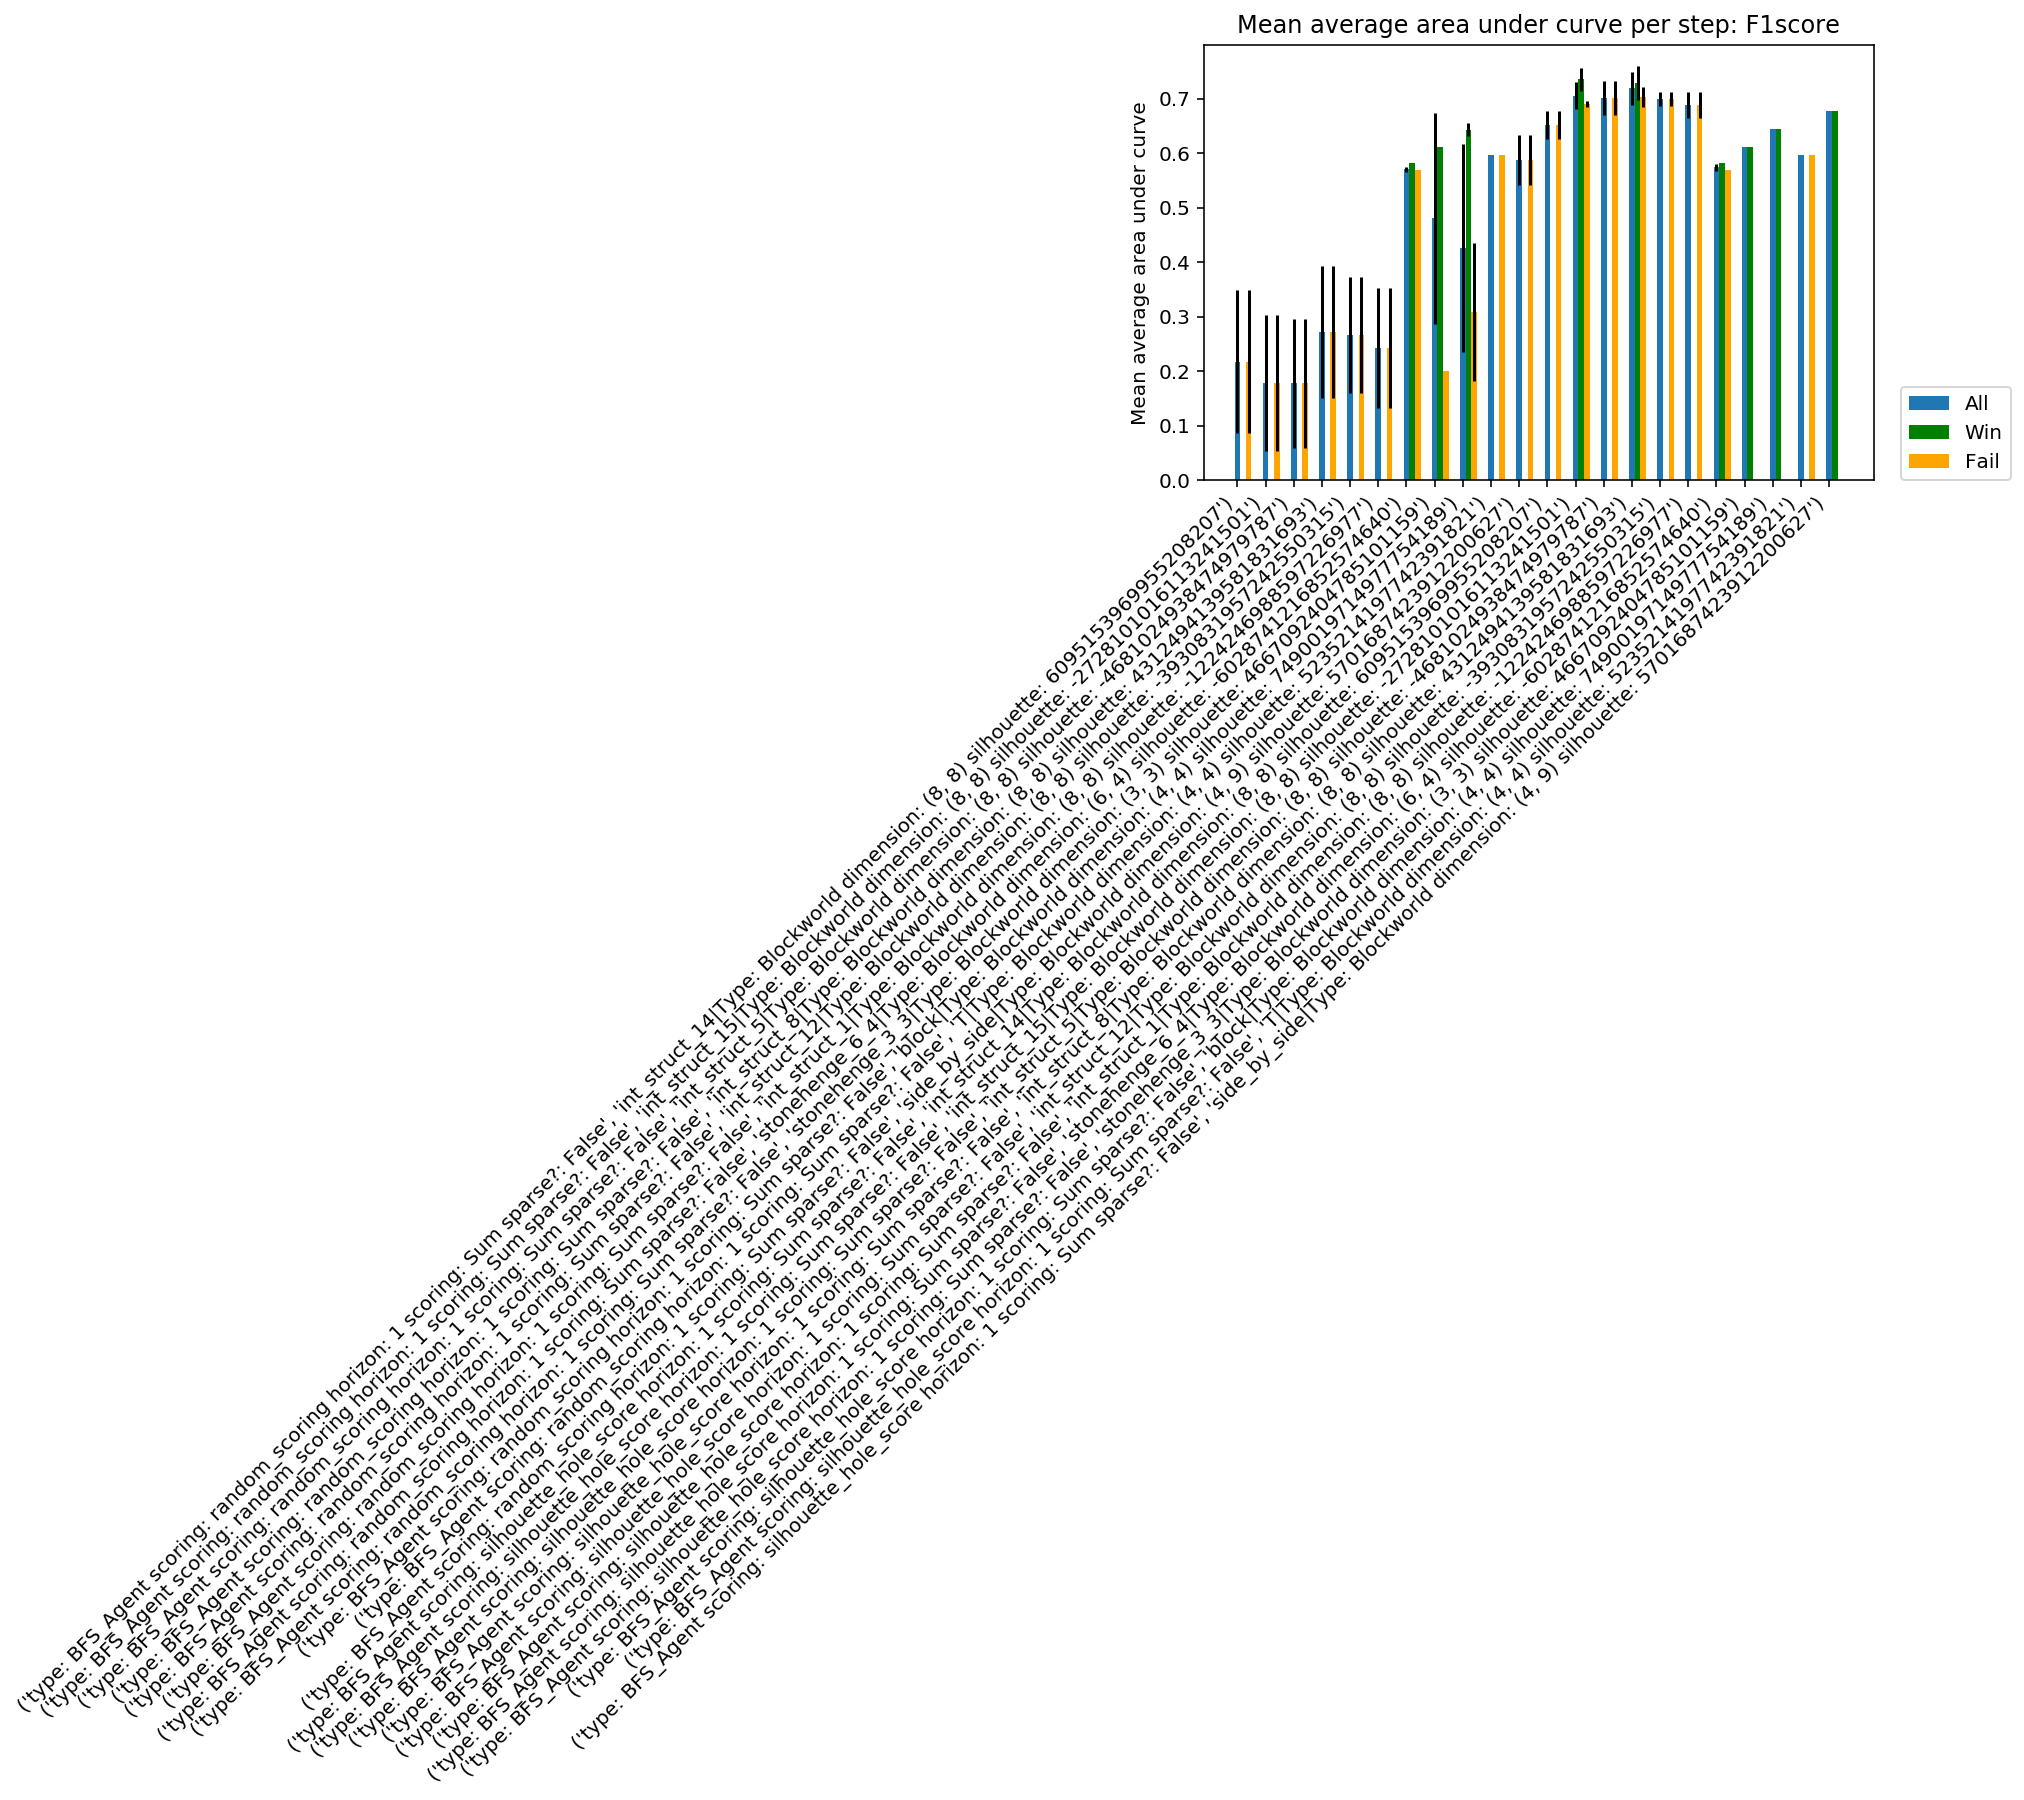

In [66]:
#📊 mean_avg_area_under_curve
scoring_function = bw.F1score
#all
results = [mean_avg_area_under_curve(df[(df['world']==w) & (df['agent']==a)],scoring_function) for a,w in agents_worlds]    
scores = [score for score,std in results]
stds = [std for score,std in results]
plt.bar(np.arange(len(scores))+0,scores,align='center',yerr=stds,label="All",width=0.2)
#win
results = [mean_avg_area_under_curve(df[(df['world']==w) & (df['agent']==a)  & (df['outcome'] == 'Win')],scoring_function) for a,w in agents_worlds]    
scores = [score for score,std in results]
stds = [std for score,std in results]
plt.bar(np.arange(len(scores))+.2,scores,align='center',yerr=stds,label="Win",color='green',width=0.2)
#fail
results = [mean_avg_area_under_curve(df[(df['world']==w) & (df['agent']==a)  & (df['outcome'] == 'Fail')],scoring_function) for a,w in agents_worlds]    
scores = [score for score,std in results]
stds = [std for score,std in results]
plt.bar(np.arange(len(scores))+.4,scores,align='center',yerr=stds,label="Fail",color='orange',width=0.2)

plt.xticks(np.arange(len(scores)),agents_worlds,rotation=45,ha='right')
plt.ylabel("Mean average area under curve")
plt.ylim(0)
plt.title("Mean average area under curve per step: "+scoring_function.__name__)
plt.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0)

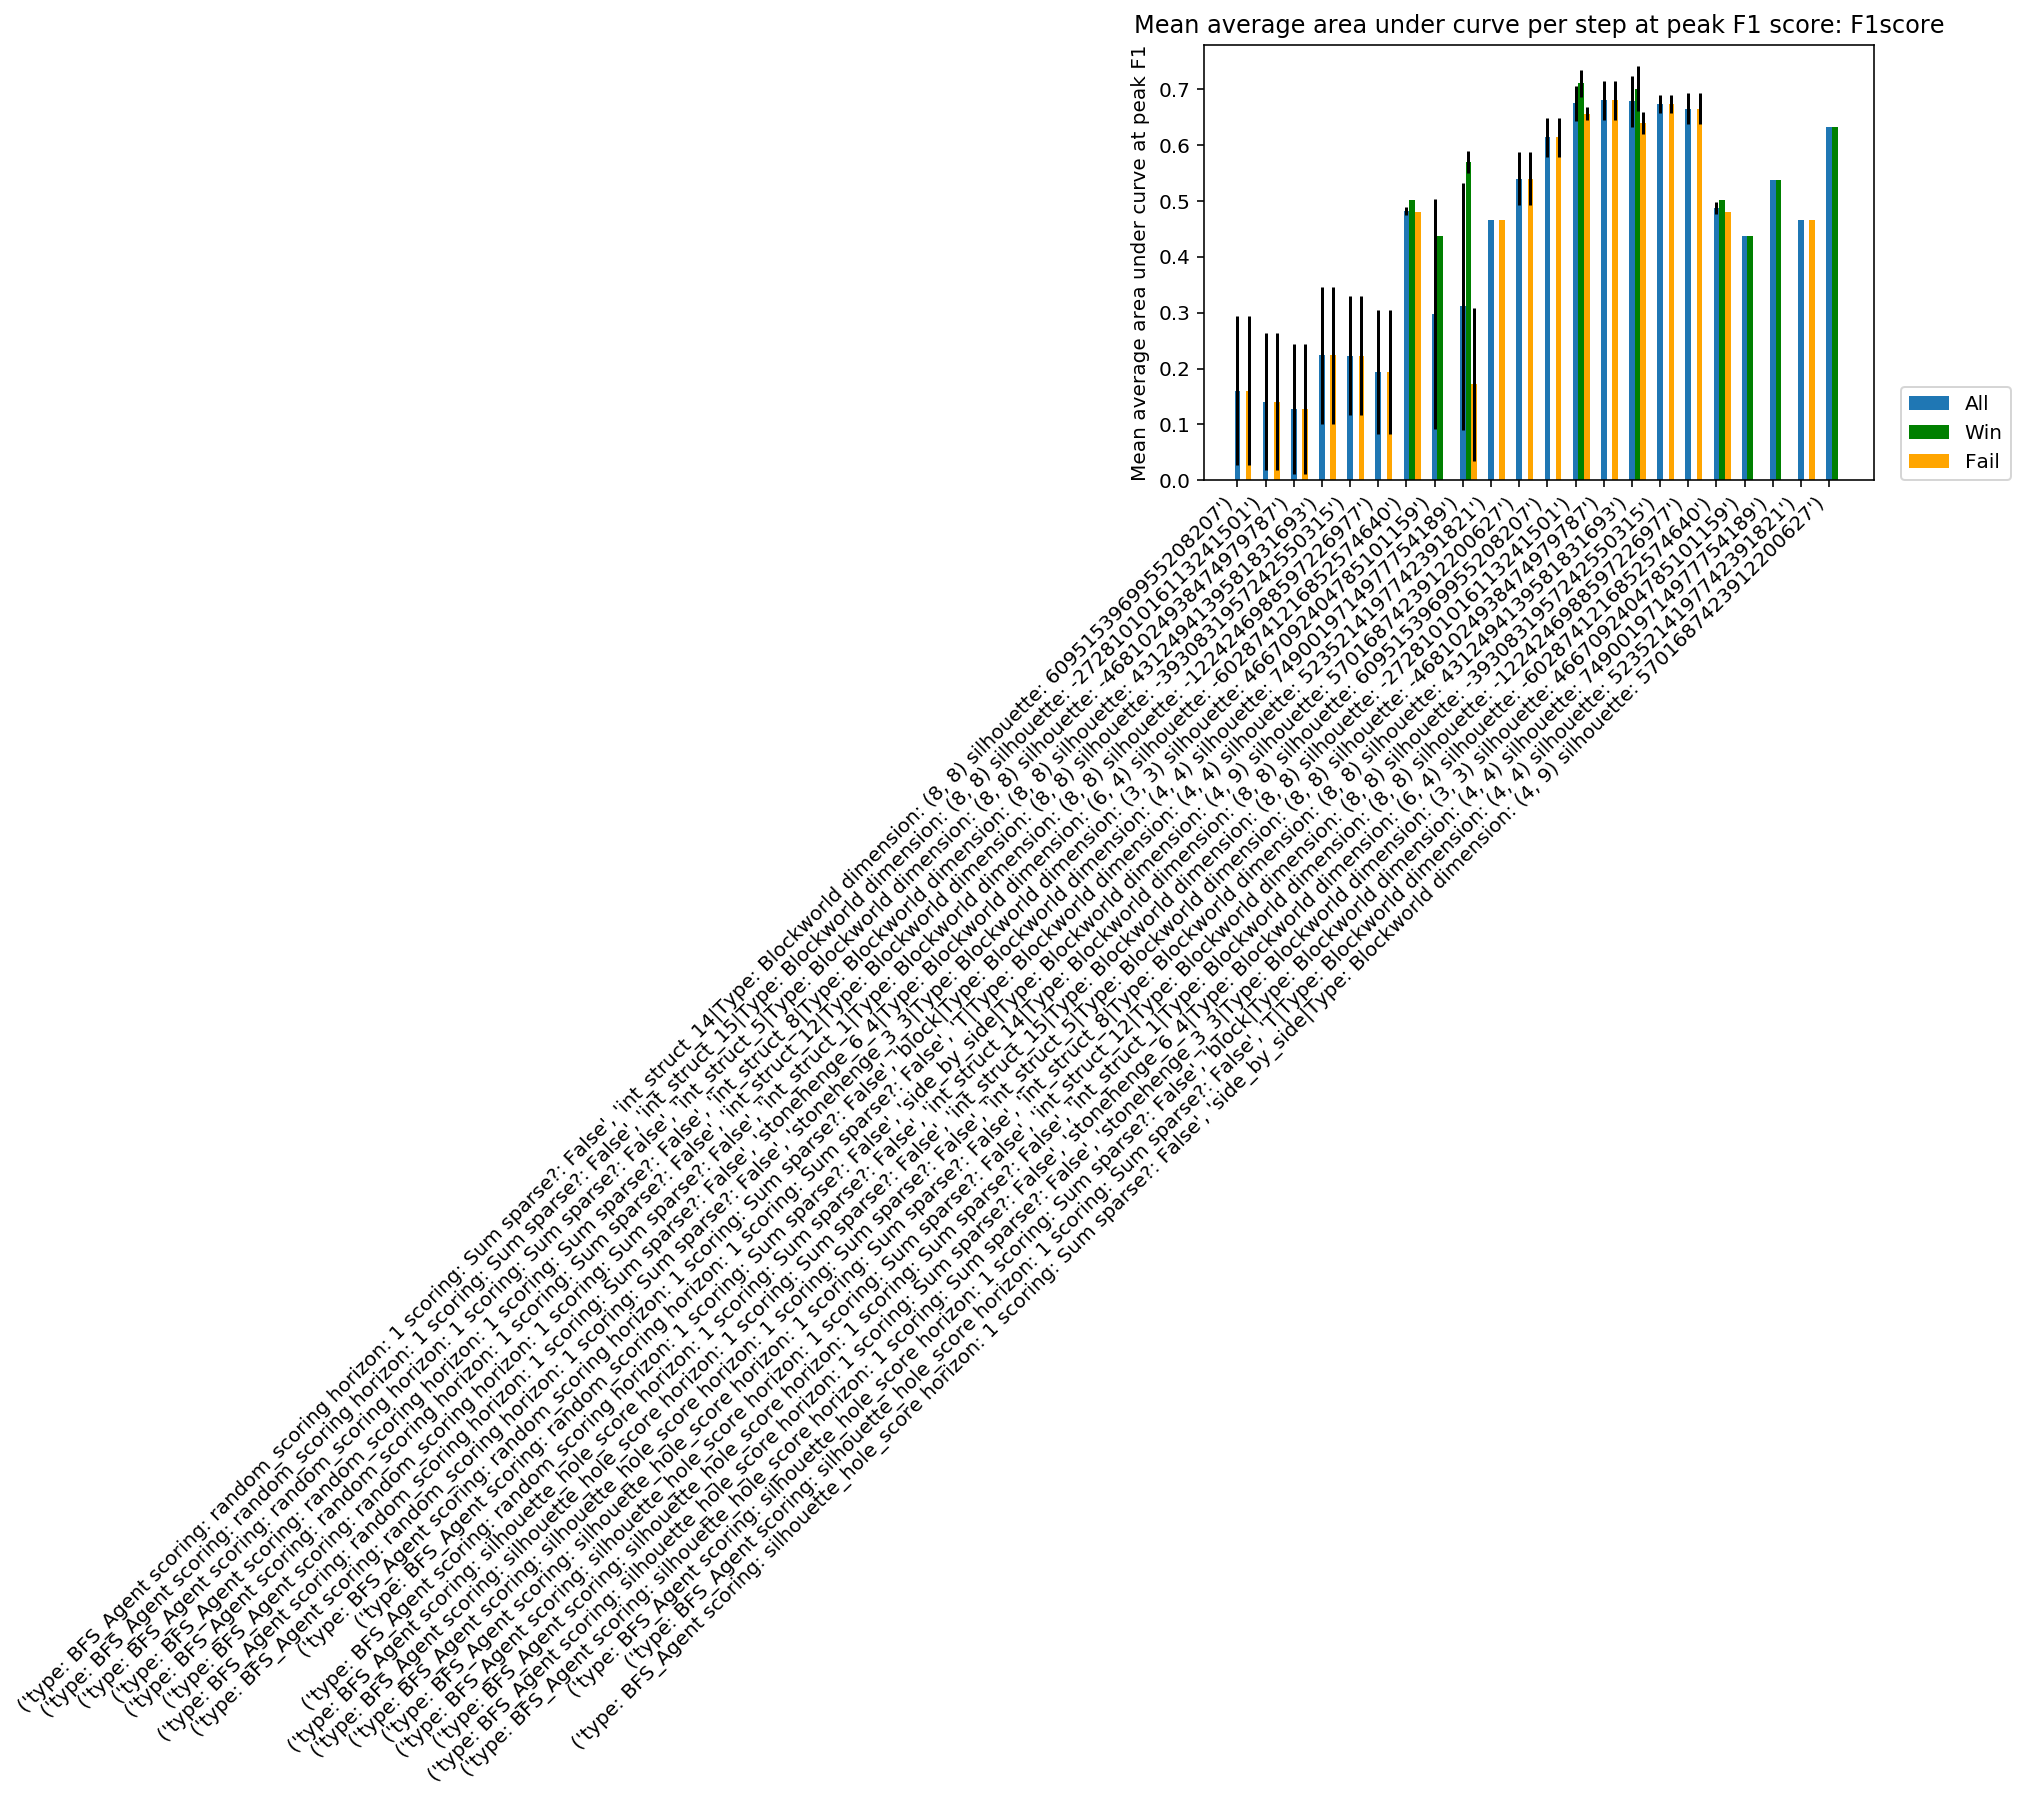

In [67]:
#📊 mean_avg_area_under_curve_to_peakF1
scoring_function = bw.F1score
#all
results = [mean_avg_area_under_curve_to_peakF1(df[(df['world']==w) & (df['agent']==a)],scoring_function) for a,w in agents_worlds]    
scores = [score for score,std in results]
stds = [std for score,std in results]
plt.bar(np.arange(len(scores))+0,scores,align='center',yerr=stds,label="All",width=0.2)
#win
results = [mean_avg_area_under_curve_to_peakF1(df[(df['world']==w) & (df['agent']==a)  & (df['outcome'] == 'Win')],scoring_function) for a,w in agents_worlds]    
scores = [score for score,std in results]
stds = [std for score,std in results]
plt.bar(np.arange(len(scores))+.2,scores,align='center',yerr=stds,label="Win",color='green',width=0.2)
#fail
results = [mean_avg_area_under_curve_to_peakF1(df[(df['world']==w) & (df['agent']==a)  & (df['outcome'] == 'Fail')],scoring_function) for a,w in agents_worlds]    
scores = [score for score,std in results]
stds = [std for score,std in results]
plt.bar(np.arange(len(scores))+.4,scores,align='center',yerr=stds,label="Fail",color='orange',width=0.2)

plt.xticks(np.arange(len(scores)),agents_worlds,rotation=45,ha='right')
plt.ylabel("Mean average area under curve at peak F1")
plt.ylim(0)
plt.title("Mean average area under curve per step at peak F1 score: "+scoring_function.__name__)
plt.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0)

### Plots

In [ ]:
#block size over worlds and agents
#crashes, but it's not important anyway
for world in worlds_index:
    dfw = df[df['world'].str.contains(world)]
    for agent in agents:
        plt.clf() #clear the plot
        for run in dfw[dfw['agent']==agent]['run']:
            blocks_obj = run[run.notnull()['chosen action']]['chosen action'].to_list()
            size = [float(a)*float(b) for a,b in [b[0][0][1:-1].split('x') for b in blocks_obj]]
            plt.plot(size)
        plt.title(agent+' on world '+world)
        plt.show()

In [ ]:
#over worlds and agents: F1 score
for world in worlds_index:
    dfw = df[df['world'].str.contains(world)]
    bw_world = bw_worlds[world.split('|')[0]]
    for agent in agents:
        plt.clf() #clear the plot
        for run in dfw[dfw['agent']==agent]['run']:
            blocks_obj = run[run.notnull()['chosen action']]['chosen action'].to_list()
            bm_obj = run[run.notnull()['blockmap']]['blockmap'].tail(1)
            blockmap = np.array(bm_obj.to_list())[0,0,::] #convert object back to np and take the wrappers off
            scores = []
            for move in range(np.max(blockmap)): #for every move
                _bmm = blockmap * (blockmap <= move)
                _state = State(bw_world,_bmm)
                score = bw.F1score(_state)
                scores.append(score)
            plt.plot(scores)
        plt.title(agent+' on world '+world)
        plt.xlim([0,20])
        plt.ylim([0,1])
        plt.show()

In [ ]:
#over worlds and agents: precision score
for world in worlds:
    dfw = df[df['world']==world]
    bw_world = bw_worlds[world]
    for agent in agents:
        plt.clf() #clear the plot
        for run in dfw[dfw['agent']==agent]['run']:
            blocks_obj = run[run.notnull()['chosen action']]['chosen action'].to_list()
            bm_obj = run[run.notnull()['blockmap']]['blockmap'].tail(1)
            blockmap = np.array(bm_obj.to_list())[0,0,::] #convert object back to np and take the wrappers off
            for move in range(np.max(blockmap)): #for every move
                _bmm = blockmap * (blockmap <= move)
                _state = State(bw_worlds[world.split('|')[0]],_bmm)
                score = bw.precision(_state)
                scores.append(score)
            plt.plot(scores)
        plt.title(agent+' on world '+world)
        plt.show()

In [ ]:
#win ratio for world & agent
for world in worlds_index:
    plt.figure(figsize=(1,1))
    plt.imshow(bw_worlds[world.split('|')[0]].silhouette)
    plt.show()
    for agent in agents:
        won = 0
        total = 0
        for index,outcome in df[(df['world'].str.contains(world)) & (df['agent'] == agent)][['outcome']].iterrows():
            if outcome[0] == 'Win': won += 1
            total += 1
        print(agent,':',won,'/',total,'->',(won/total)*100,'%')
    print('\n')

## Per horizon
### Plots
Generally, it makes more sense to narrow the agents down to only have differences in types between horizon rather than integrate between horizon and then run per agent plots

In [ ]:
#plot F1 over time for horizon
for horizon in ['1','2','3']:
    plt.clf() #clear the plot
    for row in df[df['agent'].str.contains("horizon: "+horizon)][['run','world']].iterrows():
        index, row = row
        run,world = row
        blocks_obj = run[run.notnull()['chosen action']]['chosen action'].to_list()
        bm_obj = run[run.notnull()['blockmap']]['blockmap'].tail(1)
        blockmap = np.array(bm_obj.to_list())[0,0,::] #convert object back to np and take the wrappers off
        scores =[]
        for move in range(np.max(blockmap)): #for every move
            _bmm = blockmap * (blockmap <= move)
            _state = State(bw_worlds[world.split('|')[0]],_bmm)
            score = bw.F1score(_state)
            scores.append(score)
        plt.plot(scores,linewidth=0.1)
    plt.title(horizon)
    plt.ylabel('F1 score')
    plt.xlabel('Step')
    plt.xlim(0,32)
    plt.show()

In [ ]:
#images of worlds
for i,world in enumerate(bw_worlds.values()):
    plt.figure(figsize=(20,20))
    plt.subplot(3,4,i+1)
    plt.imshow(world.silhouette)
    plt.xticks([])
    plt.yticks([])
plt.show()

## Per chosen world
For comparisions between agents on a particular world. Most plots make the most sense here

In [68]:
# chosen_world = elephant
chosen_world = 'stonehenge_6_4'

### Bar graphs

Text(0.5, 1.0, 'Perfect reconstruction')

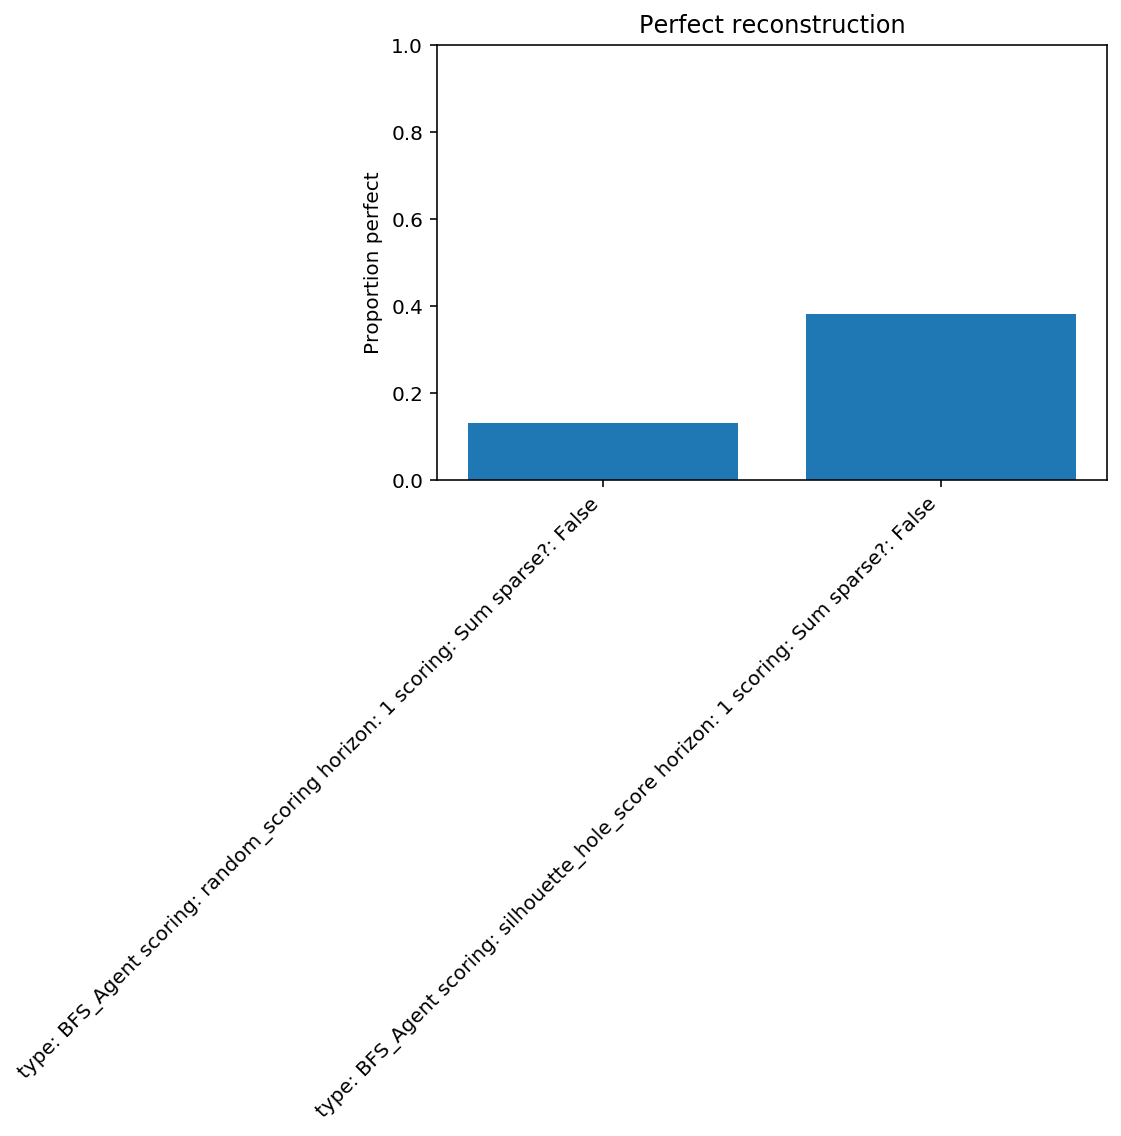

In [69]:
#📊 mean_win
scores = [mean_win(df[(df['world'].str.contains(chosen_world)) & (df['agent']==a)]) for a in agents]    
plt.bar(np.arange(len(scores)),scores,align='center')
plt.xticks(np.arange(len(scores)),agents,rotation=45,ha='right')
plt.ylim(0,1)
plt.ylabel("Proportion perfect")
plt.title("Perfect reconstruction")
# plt.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0)

In [32]:
#📊 mean_failure_reason
#Full
scores = [mean_failure_reason(df[(df['world'].str.contains(chosen_world)) & (df['agent']==a)],"Full") for a in agents]    
plt.bar(np.arange(len(scores))+0,scores,align='center',label="Full",width=0.15)
#Unstable
scores = [mean_failure_reason(df[(df['world'].str.contains(chosen_world)) & (df['agent']==a)],"Unstable") for a in agents]    
plt.bar(np.arange(len(scores))+.15,scores,align='center',label="Unstable",color='green',width=0.15)
#Outside
scores = [mean_failure_reason(df[(df['world'].str.contains(chosen_world)) & (df['agent']==a)],"Outside") for a in agents]    
plt.bar(np.arange(len(scores))+.3,scores,align='center',label="Outside",color='orange',width=0.15)
#Holes
scores = [mean_failure_reason(df[(df['world'].str.contains(chosen_world)) & (df['agent']==a)],"Holes") for a in agents]    
plt.bar(np.arange(len(scores))+.45,scores,align='center',label="Holes",color='red',width=0.15)

plt.xticks(np.arange(len(scores)),agents,rotation=45,ha='right')
plt.ylabel("Proportion")
plt.ylim(0)
plt.title("Reasons for failure")
plt.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0)

In [70]:
#📊 avg_steps_to_end
#all
results = [avg_steps_to_end(df[(df['world'].str.contains(chosen_world)) & (df['agent']==a)]) for a in agents]
scores = [score for score,std in results]
stds = [std for score,std in results]
plt.bar(np.arange(len(scores))+0,scores,align='center',yerr=stds,label="All",width=0.2)
#win
results = [avg_steps_to_end(df[(df['world'].str.contains(chosen_world)) & (df['agent']==a)  & (df['outcome'] == 'Win')]) for a in agents]    
scores = [score for score,std in results]
stds = [std for score,std in results]
plt.bar(np.arange(len(scores))+.2,scores,align='center',yerr=stds,label="Win",color='green',width=0.2)
#fail
results = [avg_steps_to_end(df[(df['world'].str.contains(chosen_world)) & (df['agent']==a)  & (df['outcome'] == 'Fail')]) for a in agents]    
scores = [score for score,std in results]
stds = [std for score,std in results]
plt.bar(np.arange(len(scores))+.4,scores,align='center',yerr=stds,label="Fail",color='orange',width=0.2)

plt.xticks(np.arange(len(scores)),agents,rotation=45,ha='right')
plt.ylabel("Average steps")
plt.ylim(0)
plt.title("Average steps to end of run")
plt.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0)

In [40]:
#📊 mean_score
scoring_function = bw.F1score
#all
results = [mean_score(df[(df['world'].str.contains(chosen_world)) & (df['agent']==a)],scoring_function) for a in agents]    
scores = [score for score,std in results]
stds = [std for score,std in results]
plt.bar(np.arange(len(scores))+0,scores,align='center',yerr=stds,label="All",width=0.2)
#win
results = [mean_score(df[(df['world'].str.contains(chosen_world)) & (df['agent']==a)  & (df['outcome'] == 'Win')],scoring_function) for a in agents]    
scores = [score for score,std in results]
stds = [std for score,std in results]
plt.bar(np.arange(len(scores))+.2,scores,align='center',yerr=stds,label="Win",color='green',width=0.2)
#fail
results = [mean_score(df[(df['world'].str.contains(chosen_world)) & (df['agent']==a)  & (df['outcome'] == 'Fail')],scoring_function) for a in agents]    
scores = [score for score,std in results]
stds = [std for score,std in results]
plt.bar(np.arange(len(scores))+.4,scores,align='center',yerr=stds,label="Fail",color='orange',width=0.2)

plt.xticks(np.arange(len(scores)),agents,rotation=45,ha='right')
plt.ylabel("Mean score")
plt.ylim(0)
plt.title("Mean score: "+scoring_function.__name__)
plt.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0)

In [71]:
#📊 mean_peak_score
scoring_function = bw.F1score
#all
results = [mean_peak_score(df[(df['world'].str.contains(chosen_world)) & (df['agent']==a)],scoring_function) for a in agents]    
scores = [score for score,std in results]
stds = [std for score,std in results]
plt.bar(np.arange(len(scores))+0,scores,align='center',yerr=stds,label="All",width=0.2)
#win
results = [mean_peak_score(df[(df['world'].str.contains(chosen_world)) & (df['agent']==a)  & (df['outcome'] == 'Win')],scoring_function) for a in agents]    
scores = [score for score,std in results]
stds = [std for score,std in results]
plt.bar(np.arange(len(scores))+.2,scores,align='center',yerr=stds,label="Win",color='green',width=0.2)
#fail
results = [mean_peak_score(df[(df['world'].str.contains(chosen_world)) & (df['agent']==a)  & (df['outcome'] == 'Fail')],scoring_function) for a in agents]    
scores = [score for score,std in results]
stds = [std for score,std in results]
plt.bar(np.arange(len(scores))+.4,scores,align='center',yerr=stds,label="Fail",color='orange',width=0.2)

plt.xticks(np.arange(len(scores)),agents,rotation=45,ha='right')
plt.ylabel("Mean peak score")
plt.ylim(0)
plt.title("Mean peak score: "+scoring_function.__name__)
plt.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0)

In [72]:
#📊 mean_avg_area_under_curve
scoring_function = bw.F1score
#all
results = [mean_avg_area_under_curve(df[(df['world'].str.contains(chosen_world)) & (df['agent']==a)],scoring_function) for a in agents]    
scores = [score for score,std in results]
stds = [std for score,std in results]
plt.bar(np.arange(len(scores))+0,scores,align='center',yerr=stds,label="All",width=0.2)
#win
results = [mean_avg_area_under_curve(df[(df['world'].str.contains(chosen_world)) & (df['agent']==a)  & (df['outcome'] == 'Win')],scoring_function) for a in agents]    
scores = [score for score,std in results]
stds = [std for score,std in results]
plt.bar(np.arange(len(scores))+.2,scores,align='center',yerr=stds,label="Win",color='green',width=0.2)
#fail
results = [mean_avg_area_under_curve(df[(df['world'].str.contains(chosen_world)) & (df['agent']==a)  & (df['outcome'] == 'Fail')],scoring_function) for a in agents]    
scores = [score for score,std in results]
stds = [std for score,std in results]
plt.bar(np.arange(len(scores))+.4,scores,align='center',yerr=stds,label="Fail",color='orange',width=0.2)

plt.xticks(np.arange(len(scores)),agents,rotation=45,ha='right')
plt.ylabel("Mean average area under curve")
plt.ylim(0)
plt.title("Mean average area under curve per step: "+scoring_function.__name__)
plt.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0)

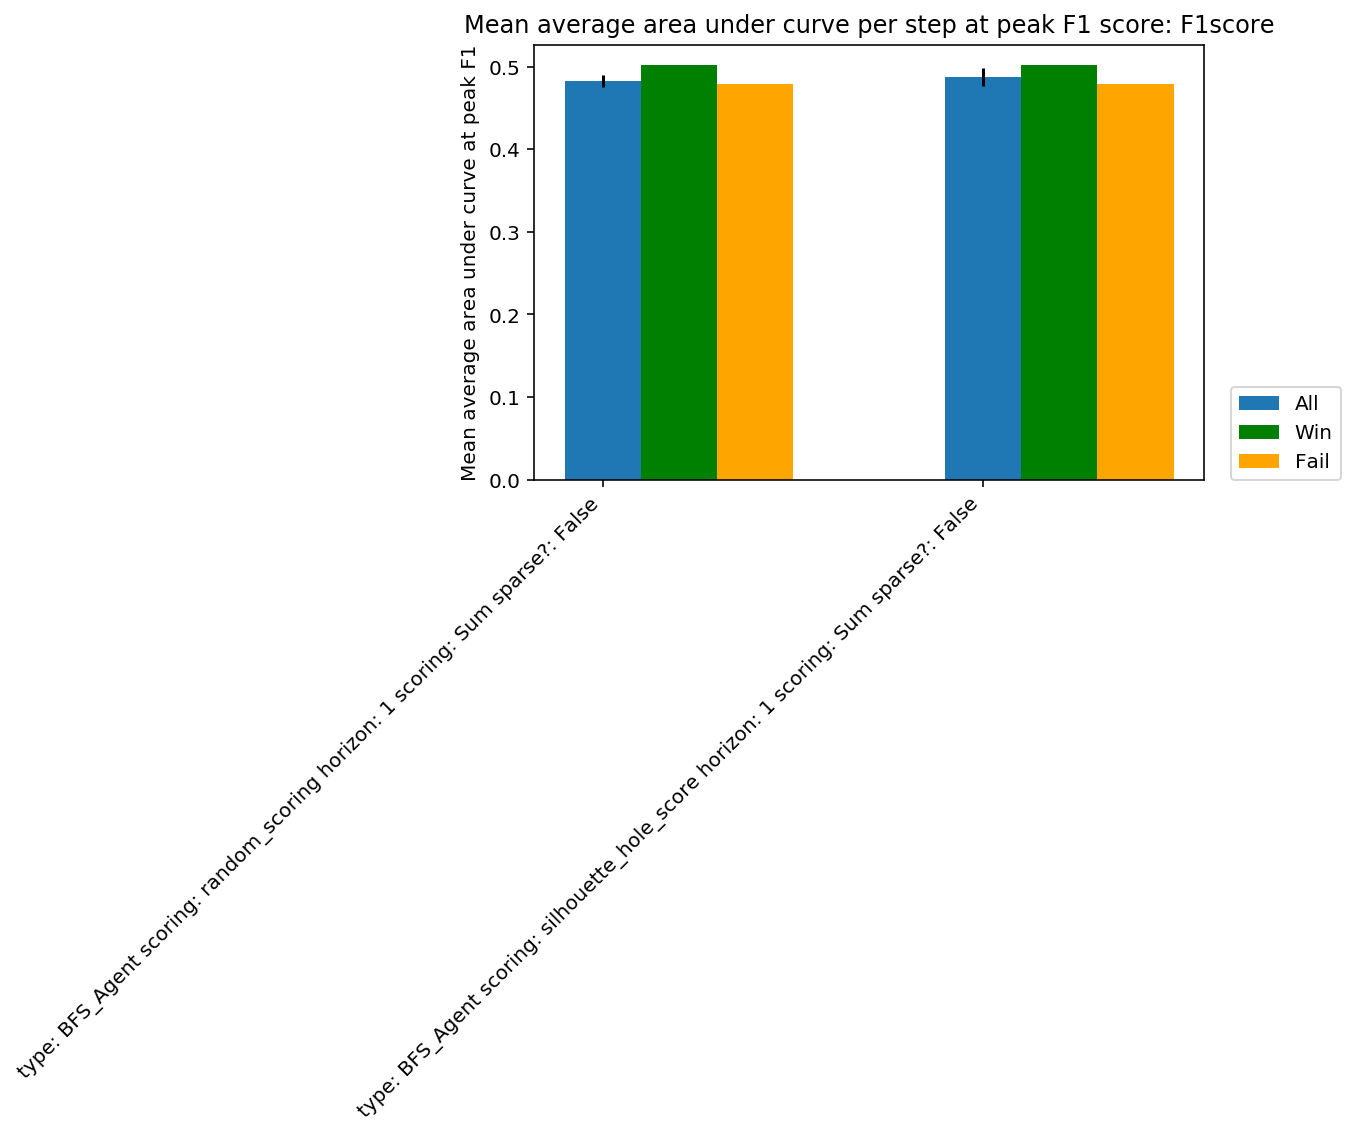

In [73]:
#📊 mean_avg_area_under_curve_to_peakF1
scoring_function = bw.F1score
#all
results = [mean_avg_area_under_curve_to_peakF1(df[(df['world'].str.contains(chosen_world)) & (df['agent']==a)],scoring_function) for a in agents]    
scores = [score for score,std in results]
stds = [std for score,std in results]
plt.bar(np.arange(len(scores))+0,scores,align='center',yerr=stds,label="All",width=0.2)
#win
results = [mean_avg_area_under_curve_to_peakF1(df[(df['world'].str.contains(chosen_world)) & (df['agent']==a)  & (df['outcome'] == 'Win')],scoring_function) for a in agents]    
scores = [score for score,std in results]
stds = [std for score,std in results]
plt.bar(np.arange(len(scores))+.2,scores,align='center',yerr=stds,label="Win",color='green',width=0.2)
#fail
results = [mean_avg_area_under_curve_to_peakF1(df[(df['world'].str.contains(chosen_world)) & (df['agent']==a)  & (df['outcome'] == 'Fail')],scoring_function) for a in agents]    
scores = [score for score,std in results]
stds = [std for score,std in results]
plt.bar(np.arange(len(scores))+.4,scores,align='center',yerr=stds,label="Fail",color='orange',width=0.2)

plt.xticks(np.arange(len(scores)),agents,rotation=45,ha='right')
plt.ylabel("Mean average area under curve at peak F1")
plt.ylim(0)
plt.title("Mean average area under curve per step at peak F1 score: "+scoring_function.__name__)
plt.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0)

### Plots

In [ ]:
#average number of steps per agent on chosen world for failure and success
for agent in agents:
    win_lengths = []
    failure_lengths = []
    for i,row in df[(df['agent']==agent) & (df['world'].str.contains(chosen_world))].iterrows():
        num_steps = len(get_blockmaps(row['run'])) # get number of steps
        if row['outcome'] == 'Win':
            win_lengths.append(num_steps)
        if row['outcome'] == 'Fail':
            failure_lengths.append(num_steps)
    print(agent)
    print(len(win_lengths),"wins with avg length",sum(win_lengths)/(len(win_lengths)+0.0001))
    print(len(failure_lengths),"failures with avg length",sum(failure_lengths)/(len(failure_lengths)+0.0001))
    print("\n")

### Over agents in one plot

In [ ]:
#wins over agent for chosen world
for agent in agents:
    wins = 0
    total = 0
    for o in df[(df['agent']==agent) & (df['world'].str.contains(chosen_world))]['outcome']:
        if o == 'Win':
            wins+=1
        total += 1
    print(wins,'/',total,str(round(100*wins/total,2))+'%',agent)

In [ ]:
#plot all F1 over time for chosen world and over agents colored by success
runs = get_BFS_runs(_world_indexes=[chosen_world]) #get runs
_agents = runs['agent'].unique() #get agents
for _agent in _agents: #plot per agent
    a_runs = runs[runs['agent'] == _agent]
    for i,row in a_runs.iterrows(): #for each run of the agent
        blockmaps = get_blockmaps(row['run']) #get sequence of blockmaps
        fin_status,fin_reason = get_final_status(row['run'])
        #calculate the score for each blockmap
        scores = []
        for bm in blockmaps:
            #make a State to score
            state = State(chosen_world_obj,bm)
            score = bw.F1score(state)
            scores.append(score)
        #plot
        plt.plot(scores,linewidth=0.3,c='green' if fin_status == 'Win' else 'red')
        plt.xlim(0,xlim)
        plt.ylim(0,1)
    plt.title('F1 for '+_agent)
    plt.show()
        

In [ ]:
#plot all F1 over time for chosen world and over agents—endaligned
runs = get_BFS_runs(_world_indexes=[chosen_world]) #get runs
_agents = runs['agent'].unique() #get agents
for _agent in _agents: #plot per agent
    a_runs = runs[runs['agent'] == _agent]
    for i,row in a_runs.iterrows(): #for each run of the agent
        blockmaps = get_blockmaps(row['run']) #get sequence of blockmaps
        fin_status,fin_reason = get_final_status(row['run'])
        #calculate the score for each blockmap
        scores = []
        for bm in blockmaps:
            #make a State to score
            state = State(chosen_world_obj,bm)
            score = bw.F1score(state)
            scores.append(score)
        #plot
        plt.plot(scores[::-1],linewidth=0.3,c='green' if fin_status == 'Win' else 'red')
        plt.xlim(xlim,0)
        plt.ylim(0,1)
    plt.title('F1 for '+_agent)
    plt.show()
        

In [ ]:
#plot mean F1,std over time for chosen world and over agents in one plot (with continuation)
#change scoring function to precision, recall,...
runs = get_BFS_runs(_world_indexes=[chosen_world]) #get runs
_agents = runs['agent'].unique() #get agents
for _agent in _agents: #plot per agent
    a_runs = runs[runs['agent'] == _agent]
    run_scores = []
    for i,row in a_runs.iterrows(): #for each run of the agent
        blockmaps = get_blockmaps(row['run']) #get sequence of blockmaps
        #calculate the score for each blockmap
        scores = []
        for bm in blockmaps:
            #make a State to score
            state = State(chosen_world_obj,bm)
            score = bw.F1score(state)
            scores.append(score)
        #append (pad) score with last value to xlim as a way of handling the early termination of trials
        scores = [scores[i] if i < len(scores) else scores[-1] for i in range(xlim+1)]
        run_scores.append(scores)
    #avg,std
    avgs = np.mean(run_scores,axis=0)
    stds = np.std(run_scores,axis=0)
    #plot
#     plt.plot(range(len(avgs)),avgs)
    plt.errorbar(range(len(avgs)),avgs,stds,label=_agent)
    plt.xlim(0,xlim)
    plt.ylim(0,1)
plt.title('Mean F1')
plt.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0)
plt.show()
        

In [ ]:
#plot avg blocksize over time for agent in chosen world
#mind that most of the later ones are NaNs!
for agent in agents:
    sizes_runs = []
    for run in df[(df['agent']==agent) & df['world'].str.contains(chosen_world)]['run']:
        blocks_obj = run[run.notnull()['chosen action']]['chosen action'].to_list()
        sizes_run = [float(a)*float(b) for a,b in [b[0][0][1:-1].split('x') for b in blocks_obj]]
        sizes_runs.append(sizes_run)
    len_seq = max([len(s) for s in sizes_runs]) #length of the longest sequence
    runs_arr = np.full([len(sizes_runs),len_seq],np.nan)
    #fill the array
    for i,sizes_run in enumerate(sizes_runs):
        runs_arr[i,0:len(sizes_run)] = sizes_run
    #get stats
    means = np.nanmean(runs_arr,axis=0)
    stds = np.nanstd(runs_arr,axis=0)
    plt.errorbar(range(len(means)),means,stds,label=agent)
plt.title("Average blocksize")
plt.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0)
plt.show()

### Run selectors
Helper functions to generate dataframes according to specifications of the agent. 
- [ ] Move to analysis.py

In [ ]:
def get_BFS_runs(_sparses = ['False','True'],
                 _horizons = ['1','2','3','4','5'],
                 _scoring_functions=['random_scoring',
                            'silhouette_hole_score','silhouette_score','F1score'],
                 _scorings = ['Sum','Average','Random','Final state'],
                 _outcomes = ['Fail','Ongoing','Win'],
                 _reasons = None,
                 _world_indexes=None):
    """Returns all rows of the dataframe that fit the list of parameters. 
    Parameters must be passed as lists.
    All reasons are ['None','Full','Holes','Unstable']
    """
    rows = []
    if _world_indexes is None:
        _world_indexes = worlds_index
    for world_index in _world_indexes:
        dfw = df[df['world'].str.contains(world_index)] #get the lines of the corresponding world
        for horizon in _horizons:
            for scoring_function in _scoring_functions:
                for sparse in _sparses:
                    for scoring in _scorings:
                        filter = "type: BFS_Agent scoring: "+scoring_function+" horizon: "+horizon+" scoring: "+scoring +" sparse\?: "+sparse
                        dfwa = dfw[dfw['agent'].str.contains(filter)]
                        for outcome in _outcomes:
                            rows.append(dfwa[dfwa['outcome'] == outcome])
    dfc = pd.concat(rows)
    if _reasons is not None: #if we want to know the reason of failure
        reasons = [get_final_status(run)[1] for run in dfc['run']]
        filter = [True if reason in _reasons else False for reason in reasons]
        dfc = dfc[filter]
    return dfc

In [ ]:
#NOT TESTED YET
def get_MCTS_runs(_budgets = ['10','100','1000','10000','100000'],
                 _outcomes = ['Fail','Ongoing','Win'],
                 _reasons = None,
                 _world_indexes=None):
    """Returns all rows of the dataframe that fit the list of parameters. 
    Parameters must be passed as lists.
    All reasons are ['None','Full','Holes','Unstable']
    """
    rows = []
    if _world_indexes is None:
        _world_indexes = worlds_index
    for world_index in _world_indexes:
        dfw = df[df['world'].str.contains(world_index)] #get the lines of the corresponding world
        for budget in _budgets:
            filter = "type: MCTS_Agent horizon: "+horizon+'\Z'
            dfwa = dfw[dfw['agent'].str.contains(filter)]
            for outcome in _outcomes:
                rows.append(dfwa[dfwa['outcome'] == outcome])
    dfc = pd.concat(rows)
    if _reasons is not None: #if we want to know the reason of failure
        reasons = [get_final_status(run)[1] for run in dfc['run']]
        filter = [True if reason in _reasons else False for reason in reasons]
        dfc = dfc[filter]
    return dfc